
>### **The Problem**
>- **Low Return on Investment Rate:** Accounting irregularities, significant financial issues, and drastic drops in demand were ruled out as causes. A **strategic failure** on the part of the CMM executives was identified.
>
>### **The Objective**
>- **Identify the Problem:** Demonstrate analytically and visually what went wrong with CMM's strategy.
>- **Investigate and Explain the Reason:** By analyzing the context, this analysis aims to precisely identify the factors that contributed to the low return on investment, evaluating both the business strategy and the economic environment in Paraguay.




## Introduction

In this project, we will analyze the sales and product distribution of CMM in Paraguay to identify problems and opportunities in the business strategy.



A preliminary analysis did not reveal any accounting irregularities, significant financial issues, or drastic drops in demand that could explain the **low return on investment rate**.

Consequently, it was concluded that there was a **strategic failure** on the part of CMM's executives.

### Paraguayan Audit Team Data:
- **sales_in_Paraguay.xlsx**: Summary of sales in Paraguay (sales by distributor and product).
- **distributors_profiles.csv**: Profile of distributors in the country, including company name, activities, and years active in the construction market.
  - `id`: Distributor identifier
  - `distributor`: Company name
  - `distributor activities`: Company activities
  - `years in the construction market`: Years active in the construction market

### CMM Marketing Team Data:
- **exports_to_Paraguay.csv**: Summaries and reports of material exports to Paraguay.

Additionally, our team compiled additional information from various sources to broaden the context of the analysis:

- CNAEP (National Classification of Economic Activities of Paraguay) data.
- UNFPA (United Nations Population Fund) reports.
- DGEEC (General Directorate of Statistics, Surveys, and Censuses of Paraguay).
- [Article](https://revistacientifica.sudamericana.edu.py/index.php/scientiamericana/article/view/175/194) on industry mapping in Paraguay registered with the Ministry of Industry and Commerce.

- **locations_profiles.csv**: Main economic activities by city.
  - `PYid`: City identifier
  - `id`: City identifier (present only if there is a company distributor in that city)
  - `location`: City name
  - `department`: Department
  - `activities`: Main economic activities of the city

All data have undergone a rigorous cleaning and validation process to ensure accuracy.

Using advanced data cleaning, modeling, and visualization techniques, our goal is to **demonstrate analytically and visually** what went wrong with CMM's strategy and, additionally, **investigate and explain the reason** by analyzing the context. This analysis aims to precisely identify the factors that contributed to the low return on investment rate, evaluating both the business strategy and the economic environment in Paraguay.


## 1) IMPORTING LIBRARIES AND OBTAINING DATA


#### Importing Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.axes import Axes
import warnings

#### Configuration for Google Colab

In [2]:
sheet_id = '1g0zNkoZQ3JVLtq8KntUcHYkbKRFnIcQv'

url = f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet='

#### Reading Data


In [3]:
df_distributors = pd.read_csv(url+'distributors', dtype={'id':np.object_})
df_exports = pd.read_csv(url+'exports', dtype={'distributor':np.object_})
df_locations = pd.read_csv(url+'locations', dtype={'id':np.object_})
df_sales = pd.read_csv(url+'sales', dtype={'distributor':np.object_})

## 2) DATA EXPLORATION AND CLEANING


### Distributors Data Exploration



In [4]:
display(df_distributors.head(3), df_distributors.tail(3))

,id,distributor,distributor activities,years in the construction market
0,565,Abernathy-Hayes,"construction materials import/distribution, ir...",15
1,1.384,Balistreri LLC,"construction materials import/distribution, si...",22
2,1.183,Brekke-Stiedemann,construction materials import/distribution,13


,id,distributor,distributor activities,years in the construction market
43,1.560,Volkman-Goyette,"construction materials import/distribution, in...",18
44,1.169,"Williamson, Bailey and McLaughlin",construction materials import/distribution,12
45,1.679,Windler-Baumbach,"construction materials import/distribution, st...",15


In [5]:
display(df_distributors.describe(include='all'))
display(df_distributors.dtypes)

,id,distributor,distributor activities,years in the construction market
count,44,44,44,46.000000
unique,44,44,19,NaN
top,565,Abernathy-Hayes,construction materials import/distribution,NaN
freq,1,1,15,NaN
mean,NaN,NaN,NaN,15.804348
std,NaN,NaN,NaN,5.775887
min,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,13.000000
50%,NaN,NaN,NaN,16.500000
75%,NaN,NaN,NaN,19.000000


id                                  object
distributor                         object
distributor activities              object
years in the construction market     int64
dtype: object

The distributor IDs contain values with periods, which are interpreted as floating-point numbers and NaN.

In [6]:
warnings.filterwarnings('ignore')
df_distributors = df_distributors.dropna()
df_distributors['id'] = df_distributors['id'].str.replace('.', '')
df_distributors['id'] = df_distributors['id'].astype('int64')
display(df_distributors.head(3))
df_distributors.dtypes

,id,distributor,distributor activities,years in the construction market
0,565,Abernathy-Hayes,"construction materials import/distribution, ir...",15
1,1384,Balistreri LLC,"construction materials import/distribution, si...",22
2,1183,Brekke-Stiedemann,construction materials import/distribution,13


id                                   int64
distributor                         object
distributor activities              object
years in the construction market     int64
dtype: object

In [7]:
display(df_distributors['distributor activities'].unique())
df_distributors.duplicated().sum()

array(['construction materials import/distribution, iron, copper & zinc production',
       'construction materials import/distribution, silicone & polystyrene production',
       'construction materials import/distribution',
       'construction materials import/distribution, iron & steel production',
       'construction materials import/distribution, copper production',
       'construction materials import/distribution, neoprene production',
       'construction materials import/distribution, zinc production',
       'construction materials import/distribution, \nelectrowelded meshes production',
       'construction materials import/distribution, electrical materials production',
       'construction materials import/distribution, insulator production',
       'construction materials import/distribution, cement production',
       'construction materials import/distribution, asphalt production',
       'construction materials import/distribution, zinc & copper production',
       

0

In [8]:
df_distributors['distributor activities'].info()

<class 'pandas.core.series.Series'>
Index: 44 entries, 0 to 45
Series name: distributor activities
Non-Null Count  Dtype 
--------------  ----- 
44 non-null     object
dtypes: object(1)
memory usage: 704.0+ bytes


### Exports Data Exploration


In [9]:
display(df_exports.head(), df_exports.tail())

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Unnamed: 13,Unnamed: 14,Columnas
0,1.526,"$22.431.099,00","$36.031.577,00","$31.118.167,00","$21.322.223,00","$35.382.848,00","$35.280.292,00","$32.362.235,00","$36.836.190,00","$9.440.858.902,00","$34.676.425,00","$31.862.742,00","$32.588.556,00",NaN,Filas,Valores
1,1.553,"$27.566.922,00","$21.996.538,00","$39.412.316,00","$25.681.987,00","$41.861.783,00","$22.408.742,00","$40.690.302,00","$37.958.885,00","$8.726.744.768,00","$26.472.020,00","$27.403.955,00","$37.881.851,00",NaN,NaN,NaN
2,1.666,"$37.577.095,00","$41.457.655,00","$31.467.967,00","$37.577.926,00","$35.845.106,00","$42.953.168,00","$33.817.289,00","$41.602.183,00","$1.223.232.055,00","$30.599.951,00","$40.514.747,00","$38.569.219,00",NaN,NaN,NaN
3,364,"$36.012.730,00","$41.667.692,00","$22.837.073,00","$29.288.200,00","$39.553.494,00","$33.513.588,00","$36.827.718,00","$29.669.764,00","$44.858.747,00","$26.820.925,00","$20.797.348,00","$21.064.408,00",NaN,NaN,NaN
4,920,"$43.416.417,00","$36.290.780,00","$23.679.738,00","$21.183.706,00","$25.210.622,00","$30.864.041,00","$41.173.207,00","$36.719.169,00","$43.893.114,00","$22.575.455,00","$21.351.499,00","$24.607.204,00",NaN,NaN,NaN


,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Unnamed: 13,Unnamed: 14,Columnas
41,325,"$25.138.331,00","$38.634.366,00","$35.724.628,00","$21.355.595,00","$42.958.842,00","$27.048.824,00","$32.985.225,00","$33.904.151,00","$38.767.257,00","$31.216.833,00","$24.977.157,00","$39.193.942,00",NaN,NaN,NaN
42,619,"$41.761.417,00","$33.709.306,00","$27.497.587,00","$28.311.310,00","$21.683.294,00","$26.276.785,00","$32.530.973,00","$21.500.385,00","$23.197.054,00","$43.835.851,00","$29.355.739,00","$43.689.411,00",NaN,NaN,NaN
43,715,"$20.880.116,00","$37.111.825,00","$34.422.161,00","$40.759.561,00","$26.050.968,00","$21.080.855,00","$21.443.932,00","$22.394.142,00","$23.084.319,00","$26.861.046,00","$23.181.358,00","$22.709.805,00",NaN,NaN,NaN
44,1.302,"$34.050.845,00","$30.151.961,00","$26.956.027,00","$45.003.866,00","$23.879.569,00","$27.287.921,00","$44.733.537,00","$21.113.491,00","$22.884.480,00","$26.530.501,00","$40.810.028,00","$27.286.530,00",NaN,NaN,NaN
45,1.093,"$35.580.430,00","$39.978.595,00","$32.046.855,00","$30.147.636,00","$36.212.747,00","$33.365.715,00","$35.482.192,00","$26.604.405,00","$21.395.275,00","$31.214.082,00","$32.655.598,00","$20.684.792,00",NaN,NaN,NaN


In [10]:
display(df_exports.describe(include='all'), df_exports.dtypes)

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Unnamed: 13,Unnamed: 14,Columnas
count,46,46,46,46,46,46,46,46,46,46,46,46,46,0.0,1,1
unique,44,44,44,44,44,44,44,44,44,44,44,44,44,NaN,1,1
top,325,"$25.138.331,00","$38.634.366,00","$35.724.628,00","$21.355.595,00","$42.958.842,00","$27.048.824,00","$32.985.225,00","$33.904.151,00","$38.767.257,00","$31.216.833,00","$24.977.157,00","$39.193.942,00",NaN,Filas,Valores
freq,2,2,2,2,2,2,2,2,2,2,2,2,2,NaN,1,1
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


distributor     object
Rubber          object
Brass           object
Vinyl           object
Granite         object
Stone           object
Brick           object
Aluminum        object
Glass           object
Plexiglass      object
Steel           object
Wood            object
Plastic         object
Unnamed: 13    float64
Unnamed: 14     object
Columnas        object
dtype: object

The dataset contains three additional columns at the end, which are removed.

In [11]:
df_exports = df_exports.drop(df_exports.columns[-3:], axis=1)
df_exports.head()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1.526,"$22.431.099,00","$36.031.577,00","$31.118.167,00","$21.322.223,00","$35.382.848,00","$35.280.292,00","$32.362.235,00","$36.836.190,00","$9.440.858.902,00","$34.676.425,00","$31.862.742,00","$32.588.556,00"
1,1.553,"$27.566.922,00","$21.996.538,00","$39.412.316,00","$25.681.987,00","$41.861.783,00","$22.408.742,00","$40.690.302,00","$37.958.885,00","$8.726.744.768,00","$26.472.020,00","$27.403.955,00","$37.881.851,00"
2,1.666,"$37.577.095,00","$41.457.655,00","$31.467.967,00","$37.577.926,00","$35.845.106,00","$42.953.168,00","$33.817.289,00","$41.602.183,00","$1.223.232.055,00","$30.599.951,00","$40.514.747,00","$38.569.219,00"
3,364,"$36.012.730,00","$41.667.692,00","$22.837.073,00","$29.288.200,00","$39.553.494,00","$33.513.588,00","$36.827.718,00","$29.669.764,00","$44.858.747,00","$26.820.925,00","$20.797.348,00","$21.064.408,00"
4,920,"$43.416.417,00","$36.290.780,00","$23.679.738,00","$21.183.706,00","$25.210.622,00","$30.864.041,00","$41.173.207,00","$36.719.169,00","$43.893.114,00","$22.575.455,00","$21.351.499,00","$24.607.204,00"


Two duplicate records were identified and removed.

In [12]:
display(df_exports[df_exports.duplicated(keep=False)], df_exports.duplicated().sum())
df_exports = df_exports.drop_duplicates()
df_exports.duplicated().sum()

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
11,325,"$25.138.331,00","$38.634.366,00","$35.724.628,00","$21.355.595,00","$42.958.842,00","$27.048.824,00","$32.985.225,00","$33.904.151,00","$38.767.257,00","$31.216.833,00","$24.977.157,00","$39.193.942,00"
13,1.169,"$38.180.046,00","$28.960.197,00","$38.400.970,00","$23.646.886,00","$39.383.770,00","$122.710.022,00","$39.875.739,00","$29.282.534,00","$38.309.291,00","$40.723.171,00","$27.897.700,00","$23.071.801,00"
19,1.169,"$38.180.046,00","$28.960.197,00","$38.400.970,00","$23.646.886,00","$39.383.770,00","$122.710.022,00","$39.875.739,00","$29.282.534,00","$38.309.291,00","$40.723.171,00","$27.897.700,00","$23.071.801,00"
41,325,"$25.138.331,00","$38.634.366,00","$35.724.628,00","$21.355.595,00","$42.958.842,00","$27.048.824,00","$32.985.225,00","$33.904.151,00","$38.767.257,00","$31.216.833,00","$24.977.157,00","$39.193.942,00"


2

0

The presence of null values and NaNs in the dataset was checked.

In [13]:
display(df_exports.isnull().sum(), df_exports.isna().sum())

distributor    0
Rubber         0
Brass          0
Vinyl          0
Granite        0
Stone          0
Brick          0
Aluminum       0
Glass          0
Plexiglass     0
Steel          0
Wood           0
Plastic        0
dtype: int64

distributor    0
Rubber         0
Brass          0
Vinyl          0
Granite        0
Stone          0
Brick          0
Aluminum       0
Glass          0
Plexiglass     0
Steel          0
Wood           0
Plastic        0
dtype: int64

The dataset contains periods in the ID (distributor), which were replaced with commas.

In [14]:
warnings.filterwarnings('ignore')
df_exports['distributor'] = df_exports['distributor'].str.replace('.', '')
display(df_exports.head(10))
df_exports['distributor'] = df_exports['distributor'].astype('int64')
df_exports.dtypes

,distributor,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,"$22.431.099,00","$36.031.577,00","$31.118.167,00","$21.322.223,00","$35.382.848,00","$35.280.292,00","$32.362.235,00","$36.836.190,00","$9.440.858.902,00","$34.676.425,00","$31.862.742,00","$32.588.556,00"
1,1553,"$27.566.922,00","$21.996.538,00","$39.412.316,00","$25.681.987,00","$41.861.783,00","$22.408.742,00","$40.690.302,00","$37.958.885,00","$8.726.744.768,00","$26.472.020,00","$27.403.955,00","$37.881.851,00"
2,1666,"$37.577.095,00","$41.457.655,00","$31.467.967,00","$37.577.926,00","$35.845.106,00","$42.953.168,00","$33.817.289,00","$41.602.183,00","$1.223.232.055,00","$30.599.951,00","$40.514.747,00","$38.569.219,00"
3,364,"$36.012.730,00","$41.667.692,00","$22.837.073,00","$29.288.200,00","$39.553.494,00","$33.513.588,00","$36.827.718,00","$29.669.764,00","$44.858.747,00","$26.820.925,00","$20.797.348,00","$21.064.408,00"
4,920,"$43.416.417,00","$36.290.780,00","$23.679.738,00","$21.183.706,00","$25.210.622,00","$30.864.041,00","$41.173.207,00","$36.719.169,00","$43.893.114,00","$22.575.455,00","$21.351.499,00","$24.607.204,00"
5,860,"$43.909.858,00","$27.128.183,00","$36.391.549,00","$21.542.467,00","$34.971.118,00","$24.495.086,00","$37.708.256,00","$26.877.104,00","$43.552.441,00","$43.933.774,00","$33.932.246,00","$25.891.558,00"
6,241,"$28.550.182,00","$36.499.732,00","$41.512.708,00","$22.262.065,00","$30.270.432,00","$34.506.212,00","$29.217.327,00","$36.706.402,00","$42.933.183,00","$37.610.210,00","$43.345.217,00","$38.564.095,00"
7,175,"$21.771.886,00","$43.109.659,00","$23.247.953,00","$22.866.072,00","$31.459.461,00","$30.652.665,00","$42.058.181,00","$41.910.985,00","$42.259.050,00","$34.391.207,00","$23.556.203,00","$26.611.825,00"
8,308,"$36.667.511,00","$25.366.105,00","$24.902.331,00","$36.605.735,00","$44.673.772,00","$31.541.390,00","$36.511.291,00","$23.484.274,00","$41.220.715,00","$28.142.369,00","$21.970.464,00","$44.234.252,00"
9,1183,"$39.958.024,00","$40.169.347,00","$35.399.555,00","$25.461.219,00","$37.801.759,00","$30.154.265,00","$42.855.837,00","$31.635.653,00","$41.009.467,00","$12.242.337.842,00","$43.253.537,00","$23.863.490,00"


distributor     int64
Rubber         object
Brass          object
Vinyl          object
Granite        object
Stone          object
Brick          object
Aluminum       object
Glass          object
Plexiglass     object
Steel          object
Wood           object
Plastic        object
dtype: object

### Locations Data Exploration


An exploration of NaNs in the data was conducted.



In [15]:
df_locations.describe(include='all')

,PYid,id,location,department,activities
count,272.000000,11,264,271,271
unique,NaN,11,263,18,9
top,NaN,409,San Miguel,Itapúa,"food and beverage products manufacture, other ..."
freq,NaN,1,2,32,219
mean,136.500000,NaN,NaN,NaN,NaN
std,78.663842,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,68.750000,NaN,NaN,NaN,NaN
50%,136.500000,NaN,NaN,NaN,NaN
75%,204.250000,NaN,NaN,NaN,NaN


In [16]:
warnings.filterwarnings('ignore')
df_locations['id'] = df_locations['id'].str.replace('.', '')
df_locations.dtypes
df_locations.head(10)


,PYid,id,location,department,activities
0,71,NaN,Abaí,Caazapá,"food and beverage products manufacture, other ..."
1,224,NaN,Acahay,Paraguarí,"food and beverage products manufacture, other ..."
2,208,NaN,Alberdi,Ñeembucú,"food and beverage products manufacture, other ..."
3,168,NaN,Alto Verá,Itapúa,"food and beverage products manufacture, other ..."
4,7,409,Altos,Cordillera,"agriculture, livestock, hunting and related, l..."
5,251,NaN,Antequera,San Pedro,"food and beverage products manufacture, other ..."
6,98,NaN,Areguá,Central,"agriculture, livestock, hunting and related, f..."
7,117,NaN,Arroyito,Concepción,"food and beverage products manufacture, other ..."
8,131,NaN,Arroyos y Esteros,Cordillera,"food and beverage products manufacture, other ..."
9,44,NaN,Asunción,Asunción,"agriculture, livestock, hunting and related, f..."


The presence of null values and NaNs in the dataset was verified.

In [17]:
display(df_locations.describe(include='all'), df_locations.dtypes)

,PYid,id,location,department,activities
count,272.000000,11,264,271,271
unique,NaN,11,263,18,9
top,NaN,409,San Miguel,Itapúa,"food and beverage products manufacture, other ..."
freq,NaN,1,2,32,219
mean,136.500000,NaN,NaN,NaN,NaN
std,78.663842,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,68.750000,NaN,NaN,NaN,NaN
50%,136.500000,NaN,NaN,NaN,NaN
75%,204.250000,NaN,NaN,NaN,NaN


PYid           int64
id            object
location      object
department    object
activities    object
dtype: object

NaNs in columns other than 'id' were removed.




In [18]:
display(df_locations.isna().sum(), df_locations.isnull().sum(), df_locations.duplicated().sum())

PYid            0
id            261
location        8
department      1
activities      1
dtype: int64

PYid            0
id            261
location        8
department      1
activities      1
dtype: int64

0

In [19]:
display(df_locations[df_locations['activities'].isna()], df_locations[df_locations['location'].isna()])
df_locations = df_locations.dropna(subset=['activities', 'location'])
display(df_locations[df_locations['activities'].isna()], df_locations[df_locations['location'].isna()])

,PYid,id,location,department,activities
264,6,0,NaN,NaN,NaN


,PYid,id,location,department,activities
264,6,0,NaN,NaN,NaN
265,130,NaN,NaN,Cordillera,"food and beverage products manufacture, other ..."
266,148,NaN,NaN,Cordillera,"food and beverage products manufacture, other ..."
267,152,NaN,NaN,Guairá,"food and beverage products manufacture, other ..."
268,157,NaN,NaN,Guairá,"food and beverage products manufacture, other ..."
269,191,NaN,NaN,Itapúa,"food and beverage products manufacture, other ..."
270,193,NaN,NaN,Itapúa,"food and beverage products manufacture, other ..."
271,239,NaN,NaN,Paraguarí,"food and beverage products manufacture, other ..."


,PYid,id,location,department,activities


,PYid,id,location,department,activities


NaNs in 'id' were filled with empty values.

In [20]:
df_locations = df_locations.fillna('')
df_locations.describe(include='all')

,PYid,id,location,department,activities
count,264.000000,264,264,264,264
unique,NaN,11,263,18,9
top,NaN,,San Miguel,Itapúa,"food and beverage products manufacture, other ..."
freq,NaN,254,2,30,212
mean,136.030303,NaN,NaN,NaN,NaN
std,79.023406,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN
25%,67.750000,NaN,NaN,NaN,NaN
50%,134.500000,NaN,NaN,NaN,NaN
75%,205.250000,NaN,NaN,NaN,NaN


### Sales Data Exploration


In [21]:
display(df_sales.head(), df_sales.tail())

,distributo,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583.0,"$54.510.203,61","$45.268.636,86","$51.579.748,25","$21.780.180,58","$26.576.776,52","$0,00","$55.872.547,77","$18.050.385,12","$178.927.599,01","$2.788,80","$54.510.203,61","$20.982,80"
1,1104.0,"$32.438.788,20","$25.837.100,49","$36.603.264,50","$21.883.374,92","$1.473.437,08","$0,00","$46.239.695,30","$33.102.840,61","$35.563.624,11","$599,01","$9.945.371,16","$187.306,41"
2,1384.0,"$21.780.180,58","$78.927.599,01","$25.837.100,49","$33.102.840,61","$51.579.748,25","$0,00","$21.883.374,92","$78.927.599,01","$1.346.769,34","$0,00","$36.603.264,50","$300.838,58"
3,379.0,"$79.358.855,35","$90.185.311,22","$45.268.636,86","$54.510.203,61","$59.358.855,35","$0,00","$79.358.855,35","$32.067.534,68","$53.172.624,14","$2.922,94","$33.102.840,61","$579.748,25"
4,1599.0,"$11.758.005,07","$21.780.180,58","$57.187.306,41","$9.945.371,16","$32.067.534,68","$0,00","$53.172.624,14","$57.187.306,41","$1.155.872.547,77","$203,61","$43.512.922,94","$730.734,07"


,distributo,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
40,808.0,"$3.221.765,13","$10.536.882,23","$35.563.624,11","$46.039.695,30","$22.300.838,58","$0,00","$51.579.748,25","$59.199.680,31","$12.466.621,84","$80,31","$36.999.867,09","$112.927.599,01"
41,325.0,"$36.999.867,09","$6.662.942,92","$76.443.998,86","$45.268.636,86","$18.050.385,12","$0,00","$22.300.838,58","$122.200.838,58","$50.009.912,25","$0,00","$21.780.180,58","$152.239.912,25"
42,1169.0,"$55.872.547,77","$18.421.797,13","$12.466.621,84","$59.862.809,01","$21.883.374,92","$0,00","$57.009.912,25","$177.874.267,01","$1.219.945.371,16","$3.640,40","$81.810.951,20","$243.662.942,92"
43,29.0,"$65.978.582,24","$36.603.264,50","$57.009.912,25","$16.931.446,04","$41.572.788,80","$42.458,00","$12.466.621,84","$9.945.371,16","$177.874.267,01","$0,00","$90.185.311,22","$325.185.311,22"
44,NaN,"$1.680.453.941,34","$1.840.659.381,00","$1.912.589.120,61","$1.845.294.550,32","$1.651.519.395,68","$152.658,00","$2.163.832.570,90","$2.173.275.882,80","$25.974.040.668,75","$58.458,00","$1.930.565.060,49","$2.047.338.174,36"


The table has a final row of totals, which was removed to avoid interference.

In [22]:
df_sales = df_sales.drop(index=44)
df_sales.tail(3)

,distributo,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
41,325.0,"$36.999.867,09","$6.662.942,92","$76.443.998,86","$45.268.636,86","$18.050.385,12","$0,00","$22.300.838,58","$122.200.838,58","$50.009.912,25","$0,00","$21.780.180,58","$152.239.912,25"
42,1169.0,"$55.872.547,77","$18.421.797,13","$12.466.621,84","$59.862.809,01","$21.883.374,92","$0,00","$57.009.912,25","$177.874.267,01","$1.219.945.371,16","$3.640,40","$81.810.951,20","$243.662.942,92"
43,29.0,"$65.978.582,24","$36.603.264,50","$57.009.912,25","$16.931.446,04","$41.572.788,80","$42.458,00","$12.466.621,84","$9.945.371,16","$177.874.267,01","$0,00","$90.185.311,22","$325.185.311,22"


## 3) DATA MODELING


Selection of Relevant Information within the Datasets

Additional context information seems to be the locations table, which shows additional information about each distributor. It contains city IDs only for cities that have a company. Cities without companies are not of interest to us, so we will discard them.

In [23]:
df_locations['id'].value_counts()

id
       254
409      1
523      1
519      1
286      1
112      1
169      1
402      1
102      1
387      1
42       1
Name: count, dtype: int64

We filtered out the cities that do not have companies.

In [24]:
df_locations = df_locations[df_locations['id'] != '']
df_locations

,PYid,id,location,department,activities
4,7,409,Altos,Cordillera,"agriculture, livestock, hunting and related, l..."
45,11,523,Coronel Martínez,Guairá,"agriculture, livestock, hunting and related"
81,5,519,Guayaybi,San Pedro,"agriculture, livestock, hunting and related"
96,1,286,Itapé,Guairá,"agriculture, livestock, hunting and related, t..."
181,3,112,San Cosme y Damián,Itapúa,"agriculture, livestock, hunting and related, t..."
195,10,169,San Miguel,Misiones,craft production
200,9,402,San Pedro del Paraná,Itapúa,"agriculture, livestock, hunting and related"
226,4,102,Tobatí,Cordillera,"bricks, tiles and ceramics manufacture, craft ..."
239,2,387,Villa Hayes,Presidente Hayes,"commerce, steel,agriculture, livestock, huntin..."
246,8,42,Yaguarón,Paraguarí,"agriculture, livestock, hunting and related, t..."


In this context, the column PYid is irrelevant, so we removed it.

In [25]:
df_locations = df_locations.drop('PYid', axis=1)

We proceed to normalize the IDs in the different tables to make it easier to join them, renaming each column that functions as an ID.

In [31]:
df_locations = df_locations.rename(columns={'id': 'location_id'})
df_distributors = df_distributors.rename(columns={'id':'distributor_id'})
df_exports = df_exports.rename(columns={'distributor':'distributor_id'})
df_sales = df_sales.rename(columns={'distributo':'distributor_id'})
display(df_locations.head(1), df_exports.head(1), df_distributors.head(1), df_sales.head(1))

,location_id,location,department,activities
4,409,Altos,Cordillera,"agriculture, livestock, hunting and related, l..."


,distributor_id,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,22431099.0,36031577.0,31118167.0,21322223.0,35382848.0,35280292.0,32362235.0,36836190.0,9.440859e+09,34676425.0,31862742.0,32588556.0


,distributor_id,distributor,distributor activities,years in the construction market
0,565,Abernathy-Hayes,"construction materials import/distribution, ir...",15


,distributor_id,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583.0,54510203.61,45268636.86,51579748.25,21780180.58,26576776.52,0.0,55872547.77,18050385.12,1.789276e+08,2788.8,54510203.61,20982.8


We modify the data to enable operations within the Exports and Sales tables.

In [32]:
def change_data(column: pd.Series) -> pd.Series:
    return column.replace({'\$': '', '\.': ''}, regex=True).replace('\,', '.', regex=True)

columns_to_modify = df_exports.columns[1:]
df_exports[columns_to_modify] = df_exports[columns_to_modify].apply(change_data).astype('float64')
columns_to_modify = df_sales.columns[1:]
df_sales[columns_to_modify] = df_sales[columns_to_modify].apply(change_data).astype('float64')

display(df_exports.head(3), df_exports.dtypes)
display(df_sales.head(3), df_sales.dtypes)

,distributor_id,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,1526,22431099.0,36031577.0,31118167.0,21322223.0,35382848.0,35280292.0,32362235.0,36836190.0,9.440859e+09,34676425.0,31862742.0,32588556.0
1,1553,27566922.0,21996538.0,39412316.0,25681987.0,41861783.0,22408742.0,40690302.0,37958885.0,8.726745e+09,26472020.0,27403955.0,37881851.0
2,1666,37577095.0,41457655.0,31467967.0,37577926.0,35845106.0,42953168.0,33817289.0,41602183.0,1.223232e+09,30599951.0,40514747.0,38569219.0


distributor_id      int64
Rubber            float64
Brass             float64
Vinyl             float64
Granite           float64
Stone             float64
Brick             float64
Aluminum          float64
Glass             float64
Plexiglass        float64
Steel             float64
Wood              float64
Plastic           float64
dtype: object

,distributor_id,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,583.0,54510203.61,45268636.86,51579748.25,21780180.58,26576776.52,0.0,55872547.77,18050385.12,1.789276e+08,2788.80,54510203.61,20982.80
1,1104.0,32438788.20,25837100.49,36603264.50,21883374.92,1473437.08,0.0,46239695.30,33102840.61,3.556362e+07,599.01,9945371.16,187306.41
2,1384.0,21780180.58,78927599.01,25837100.49,33102840.61,51579748.25,0.0,21883374.92,78927599.01,1.346769e+06,0.00,36603264.50,300838.58


distributor_id    float64
Rubber            float64
Brass             float64
Vinyl             float64
Granite           float64
Stone             float64
Brick             float64
Aluminum          float64
Glass             float64
Plexiglass        float64
Steel             float64
Wood              float64
Plastic           float64
dtype: object

#### We create an ROI DataFrame that allows us to see the return on investment by using the Exports and Sales tables


First, we sort the tables to ensure proper operations.

In [33]:
print(df_sales.columns)
print(df_exports.columns)

Index(['distributor_id', 'Rubber', 'Brass', 'Vinyl', 'Granite', 'Stone',
       'Brick', 'Aluminum', 'Glass', 'Plexiglass', 'Steel', 'Wood', 'Plastic'],
      dtype='object')
Index(['distributor_id', 'Rubber', 'Brass', 'Vinyl', 'Granite', 'Stone',
       'Brick', 'Aluminum', 'Glass', 'Plexiglass', 'Steel', 'Wood', 'Plastic'],
      dtype='object')


In [34]:
df_sales['distributor_id'] = df_sales['distributor_id'].astype('int64')
df_sales = df_sales.sort_values('distributor_id').reset_index(drop=True)
df_exports['distributor_id'] = df_exports['distributor_id'].astype('int64')
df_exports = df_exports.sort_values('distributor_id').reset_index(drop=True)
df_exports.dtypes

distributor_id      int64
Rubber            float64
Brass             float64
Vinyl             float64
Granite           float64
Stone             float64
Brick             float64
Aluminum          float64
Glass             float64
Plexiglass        float64
Steel             float64
Wood              float64
Plastic           float64
dtype: object

We create the DataFrame from the difference between Exports and Sales to analyze the ROI.

In [36]:
distributor_id_column = df_sales[['distributor_id']].astype('Int64')
values_roi = df_sales.iloc[:, 1:] - df_exports.iloc[:, 1:]
df_ROI = pd.concat([distributor_id_column, values_roi], axis=1)
df_ROI.head(10)

,distributor_id,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic
0,29,22402059.24,6421706.50,2.423653e+07,-19737949.96,-3555637.20,-34297891.0,-2.234097e+07,-1.540855e+07,1.524166e+08,-44468552.00,6.483331e+07,2.942256e+08
1,161,20965542.80,12558562.11,-3.267741e+05,53295900.35,-26350066.66,-37406486.0,4.171639e+05,1.252255e+08,1.495702e+07,-41512687.32,3.796402e+07,1.725775e+06
2,175,4804890.52,-20808820.42,-2.177452e+07,18706716.80,34519121.24,-30652665.0,-1.585906e+05,-2.002761e+07,1.189770e+08,-34390769.92,-6.893260e+06,-1.485382e+07
3,234,-26004395.68,-11514544.93,-1.780699e+07,2604624.94,-28201570.67,-20840169.0,-1.541592e+07,6.130067e+06,1.120731e+09,-43018836.00,8.888236e+06,2.060671e+07
4,241,31312627.01,18521250.80,3.741489e+07,32758917.80,24239771.61,-34506212.0,-7.955299e+05,9.533293e+06,1.208780e+07,-37609258.68,9.827407e+06,-2.609747e+07
5,308,-18617125.88,16533485.44,8.200510e+06,-16261727.16,594864.86,-31541390.0,1.413630e+08,3.092503e+06,1.185951e+09,-28142343.39,1.960032e+07,2.162856e+07
6,325,11861536.09,-31971423.08,4.071937e+07,23913041.86,-24908456.88,-27048824.0,-1.068439e+07,8.829669e+07,1.124266e+07,-31216833.00,-3.196976e+06,1.130460e+08
7,364,17159894.14,-8564851.39,1.550372e+08,52524751.32,2857902.23,-33513588.0,-3.012132e+07,3.019305e+07,1.231585e+09,-26820828.77,1.570769e+08,2.243651e+07
8,378,-19536144.67,-11032586.68,-1.393388e+07,18758094.25,-9962724.42,-36952951.0,-1.110943e+07,7.597224e+06,1.173593e+08,-30279857.23,-8.850474e+06,7.914568e+06
9,379,37197942.35,48775833.22,8.158119e+06,29299540.61,31342461.35,-43238079.0,3.652929e+07,6.630405e+06,2.857263e+07,-32967680.06,1.220260e+07,-3.498331e+07


We add a Totals column to view the ROI for each distributor.

In [37]:
df_ROI['Total'] = df_ROI.iloc[:, 1:].sum(axis=1)
df_ROI.head(1)

,distributor_id,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Total
0,29,22402059.24,6421706.5,24236530.25,-19737949.96,-3555637.2,-34297891.0,-22340974.16,-15408546.84,1.524166e+08,-44468552.0,64833306.22,2.942256e+08,4.247262e+08


We combine the Distributors table with the ROI table to view the ROI for each distributor

In [38]:
df_ROI_distributor = df_distributors.merge(df_ROI, how='inner', on='distributor_id')
df_ROI_distributor.head()

,distributor_id,distributor,distributor activities,years in the construction market,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Total
0,565,Abernathy-Hayes,"construction materials import/distribution, ir...",15,33501947.25,11327157.14,-5055966.91,23745723.31,51648673.01,-28894894.0,8358496.23,26335865.77,-1.110913e+07,-2.225255e+07,-15024335.42,-4.187488e+07,3.070611e+07
1,1384,Balistreri LLC,"construction materials import/distribution, si...",22,-12764117.42,51044734.01,3172900.49,12045194.61,28983950.25,-39745929.0,-10101050.08,45319338.01,-3.340945e+07,-3.350758e+07,-3692039.50,-4.378163e+07,-3.643568e+07
2,1183,Brekke-Stiedemann,construction materials import/distribution,13,15062958.80,-30223975.84,-15055547.16,16466380.01,4097840.44,-30154265.0,-5855969.91,50177298.32,4.917584e+07,-1.224233e+10,-27167520.67,3.737259e+07,-1.217843e+10
3,1526,Collins LLC,construction materials import/distribution,12,9636435.68,29947005.24,-15032150.67,15281041.50,17789776.14,-35280292.0,33616347.24,5063400.44,-8.686349e+09,-3.467604e+07,29373333.66,1.365114e+07,-8.616979e+09
4,29,Cummings-Ward,"construction materials import/distribution, ir...",23,22402059.24,6421706.50,24236530.25,-19737949.96,-3555637.20,-34297891.0,-22340974.16,-15408546.84,1.524166e+08,-4.446855e+07,64833306.22,2.942256e+08,4.247262e+08


## 4) INFORMATION ANALYSIS

We analyze the information from the Paraguay audit to address our question concerning the low return on investment.

We observe that the locations table did not provide significant information that could be related to other tables or contribute to solving the problem. Therefore, it will not be prominently included in the analysis.

We identify the distributors with the highest and lowest total ROI and print their names and totals.

In [39]:
min_total_index = df_ROI_distributor['Total'].idxmin()
max_total_index = df_ROI_distributor['Total'].idxmax()

print(f'''The distributor with the highest ROI was {df_ROI_distributor['distributor'].loc[max_total_index]} with a total of ${int(df_ROI_distributor['Total'].loc[max_total_index])}.
The distributor with the lowest ROI was {df_ROI_distributor['distributor'].loc[min_total_index]} with a total of ${int(df_ROI_distributor['Total'].loc[min_total_index])}.''')

The distributor with the highest ROI was Tromp-Abshire with a total of $5512260518.
The distributor with the lowest ROI was Brekke-Stiedemann with a total of $-12178431091.


We analyze the total ROI for Paraguay.

We print the ROI, the average ROI, and the median ROI.

In [40]:
print(f'The total ROI for Paraguay is: ${int(df_ROI["Total"].sum())}')
print(f'The average ROI is: ${int(df_ROI["Total"].mean())}')
print(f'The median ROI is: ${int(df_ROI["Total"].median())}')

The total ROI for Paraguay is: $-9348476187
The average ROI is: $-212465367
The median ROI is: $92361039


## 5) DATA VISUALIZATION FOR ANALYSIS

#### Box Plot of Distributor ROI

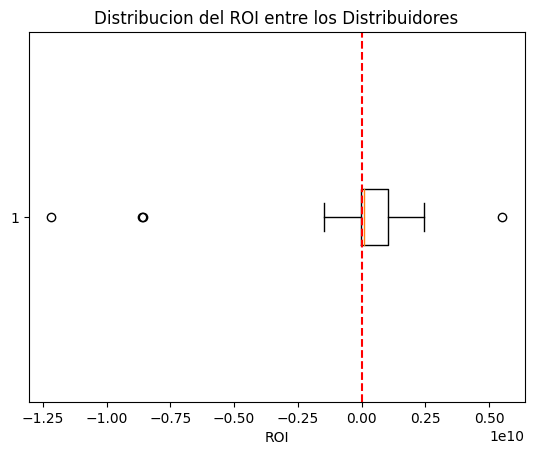

In [ ]:
plt.boxplot(df_ROI_distributor['Total'], vert=False)
plt.title('Distribution of ROI Among Distributors')
plt.xlabel('ROI')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

In the box plot, we can observe a very negative outlier corresponding to the distributor with the lowest ROI, Brekke-Stiedemann, with an ROI of $-12,178,431,091.

#### Distributors with Negative ROI

We create a list of distributors with negative ROI.

In [41]:
distributors_negative_ROI = df_ROI_distributor[df_ROI_distributor['Total'] < 0].sort_values('Total')
print(len(distributors_negative_ROI))
display(distributors_negative_ROI, len(distributors_negative_ROI))

13


,distributor_id,distributor,distributor activities,years in the construction market,Rubber,Brass,Vinyl,Granite,Stone,Brick,Aluminum,Glass,Plexiglass,Steel,Wood,Plastic,Total
2,1183,Brekke-Stiedemann,construction materials import/distribution,13,15062958.80,-3.022398e+07,-15055547.16,1.646638e+07,4097840.44,-3.015426e+07,-5855969.91,50177298.32,4.917584e+07,-1.224233e+10,-27167520.67,37372585.66,-1.217843e+10
3,1526,Collins LLC,construction materials import/distribution,12,9636435.68,2.994701e+07,-15032150.67,1.528104e+07,17789776.14,-3.528029e+07,33616347.24,5063400.44,-8.686349e+09,-3.467604e+07,29373333.66,13651139.30,-8.616979e+09
28,1553,Mraz Group,"construction materials import/distribution, br...",15,5535918.61,-1.131631e+05,4100606.94,1.521923e+08,-9422994.80,-2.240874e+07,-22639916.88,15213739.14,-8.681476e+09,-2.647192e+07,24175793.25,-21795834.67,-8.583110e+09
20,1463,"Kreiger, Leffler and Dibbert",construction materials import/distribution,15,-8246004.08,-1.867834e+07,27311912.01,4.965491e+06,-34811196.84,-1.643044e+09,-2066640.32,15326928.09,2.044910e+08,-3.726673e+07,26560725.24,-1337461.77,-1.466795e+09
35,815,Schamberger and Sons,"construction materials import/distribution, co...",8,18726148.25,2.303202e+06,21227856.14,3.722666e+06,-4831218.51,-9.409755e+08,21604155.94,-29050714.16,2.930228e+07,-3.899481e+07,-19839618.16,-4488407.39,-9.412940e+08
41,1560,Volkman-Goyette,"construction materials import/distribution, in...",18,19697809.41,1.549984e+08,20135565.61,8.772050e+06,-30581809.87,-9.258356e+08,36299987.01,-36589428.66,-1.385384e+07,-2.111499e+07,-7006512.16,17918119.61,-7.771603e+08
22,1104,Langworth Group,"construction materials import/distribution, ne...",22,-8948350.80,-7.136405e+06,-1916861.50,-1.562235e+07,-31308119.92,-1.596246e+08,22395378.30,-7105151.39,5.215420e+06,-2.340331e+07,-14160325.84,-29756919.59,-2.713716e+08
27,1666,"Marks, Walker and Streich","construction materials import/distribution, ce...",25,7691541.86,3.790120e+07,27731713.31,-1.100115e+07,-2742265.39,-4.295050e+07,11451347.86,-14422304.14,-1.966553e+08,-3.059714e+07,14506235.80,-20147421.87,-2.192340e+08
17,860,Kling Group,"construction materials import/distribution, in...",20,-7306593.50,2.738202e+07,-35044779.66,-3.120670e+06,-24434235.77,-2.449509e+07,-15928075.42,-15119098.93,-3.179444e+07,-4.392647e+07,42511752.86,-24418120.92,-1.556938e+08
1,1384,Balistreri LLC,"construction materials import/distribution, si...",22,-12764117.42,5.104473e+07,3172900.49,1.204519e+07,28983950.25,-3.974593e+07,-10101050.08,45319338.01,-3.340945e+07,-3.350758e+07,-3692039.50,-43781631.42,-3.643568e+07


13

#### Horizontal Bar Chart of Distributors with Negative ROI

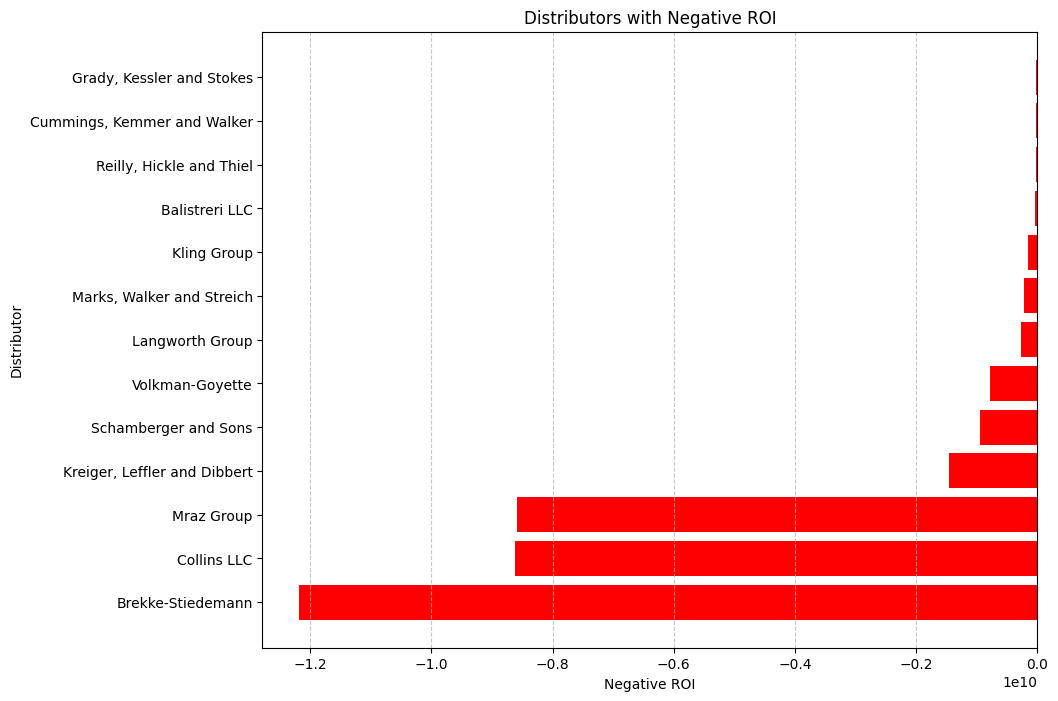

In [42]:
plt.figure(figsize=(10, 8))
plt.barh(distributors_negative_ROI['distributor'], distributors_negative_ROI['Total'], color='red')
plt.xlabel('Negative ROI')
plt.ylabel('Distributor')
plt.title('Distributors with Negative ROI')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Average ROI by Distributor Activity

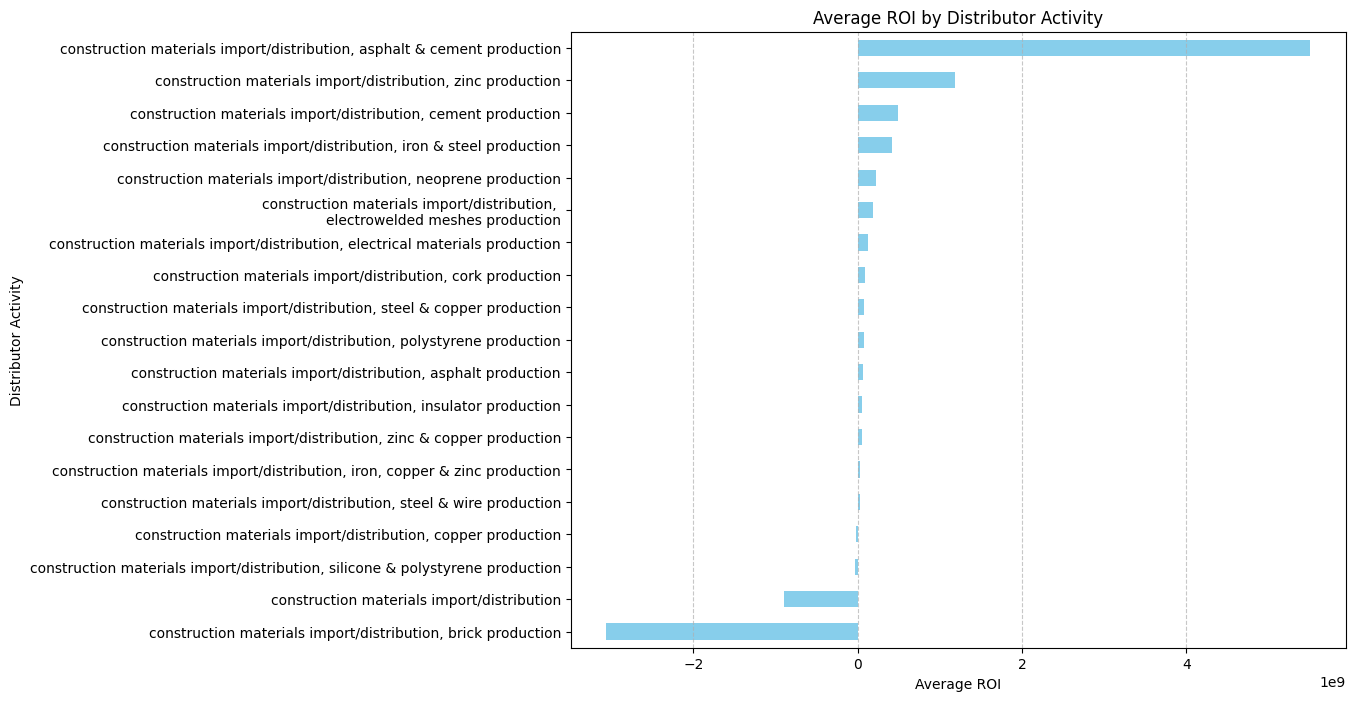

In [43]:
mean_roi_per_activity = df_ROI_distributor.groupby('distributor activities')['Total'].mean().sort_values()

plt.figure(figsize=(10, 8))
mean_roi_per_activity.plot(kind='barh', color='skyblue')
plt.xlabel('Average ROI')
plt.ylabel('Distributor Activity')
plt.title('Average ROI by Distributor Activity')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

#### Distribution of ROI by Distributor Activity

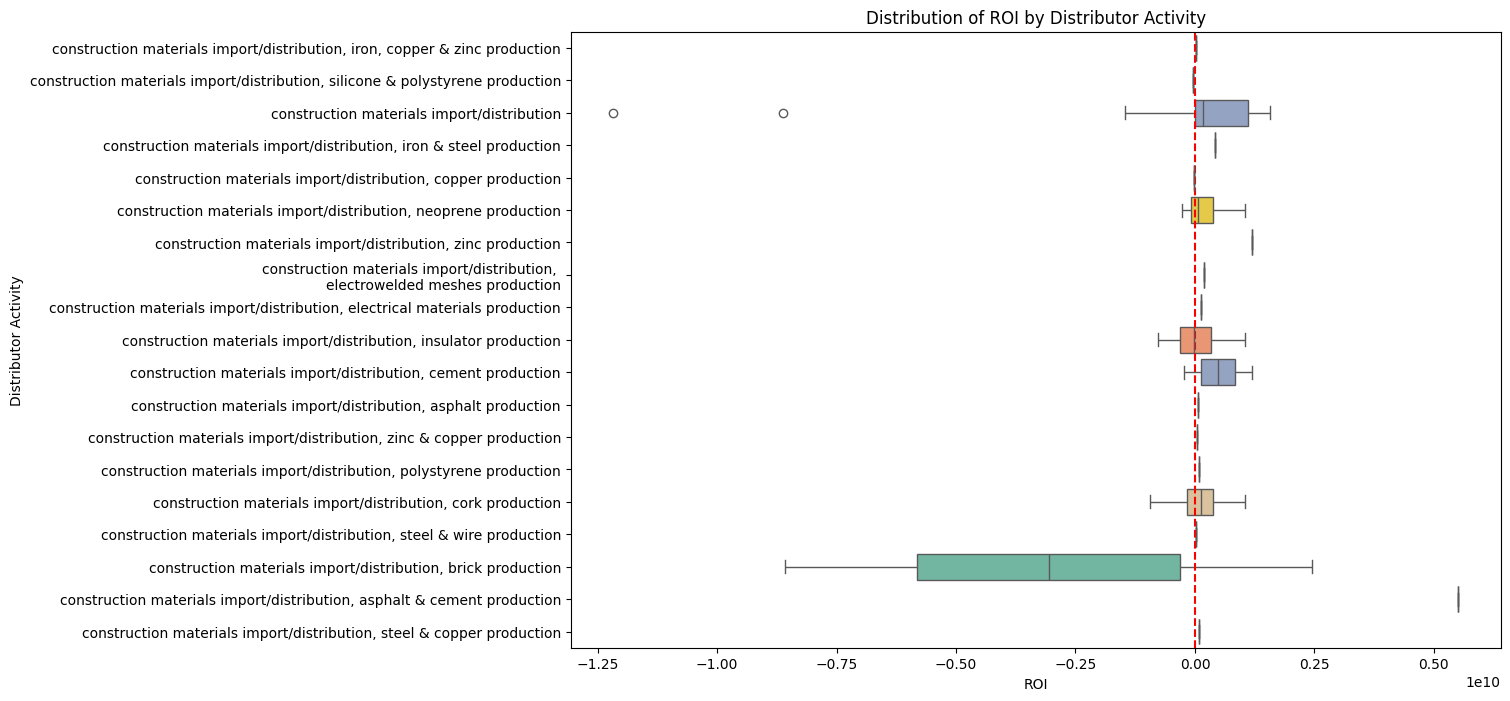

In [44]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_ROI_distributor, x='Total', y='distributor activities', palette='Set2')
plt.xlabel('ROI')
plt.ylabel('Distributor Activity')
plt.title('Distribution of ROI by Distributor Activity')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

#### Analysis of Zero Sales for Materials

In [45]:
filtered_df = df_sales[(df_sales['Brick'] == 0.0) & (df_sales['Steel'] == 0.0)]
filtered_df_brick = df_sales[df_sales['Brick'] == 0.0]
filtered_df_steel = df_sales[df_sales['Steel'] == 0.0]

count_steel_zero = filtered_df_steel.shape[0]
count_brick_zero = filtered_df_brick.shape[0]

total_distributors = df_ROI_distributor['distributor_id'].nunique()

percent_steel_zero = (count_steel_zero / total_distributors) * 100
percent_brick_zero = (count_brick_zero / total_distributors) * 100

print(f"Number of sales with Steel = 0: {count_steel_zero}")
print(f"Number of sales with Brick = 0: {count_brick_zero}")
print(f"Total number of distributors: {total_distributors}")
print(f"Percentage of sales with Steel = 0 relative to total distributors: {percent_steel_zero:.2f}%")
print(f"Percentage of sales with Brick = 0 relative to total distributors: {percent_brick_zero:.2f}%")

Number of sales with Steel = 0: 12
Number of sales with Brick = 0: 36
Total number of distributors: 44
Percentage of sales with Steel = 0 relative to total distributors: 27.27%
Percentage of sales with Brick = 0 relative to total distributors: 81.82%


#### Visualization of Total ROI for Each Material

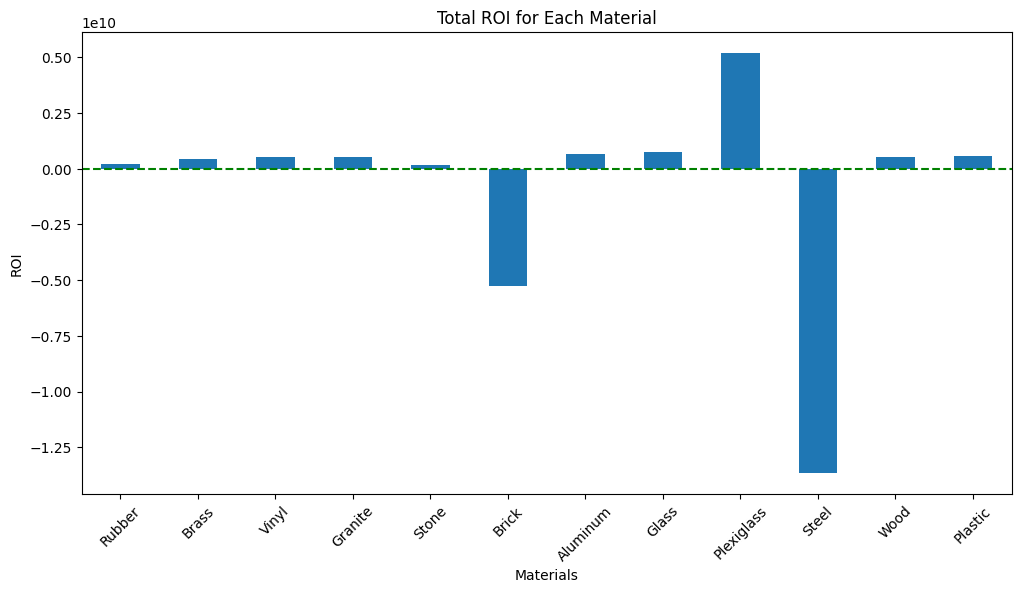

In [46]:
columns_to_plot = df_ROI_distributor.columns[4:-1]
sums = df_ROI_distributor[columns_to_plot].sum()

plt.figure(figsize=(12, 6))
sums.plot(kind='bar')

plt.xlabel('Materials')
plt.ylabel('ROI')
plt.title('Total ROI for Each Material')
plt.axhline(0, color='g', linestyle='--')
plt.xticks(rotation=45)

plt.show()

#### Individual ROI by Material for Distributors with Negative ROI

We visualize the individual ROI by material for each distributor with a negative total ROI.

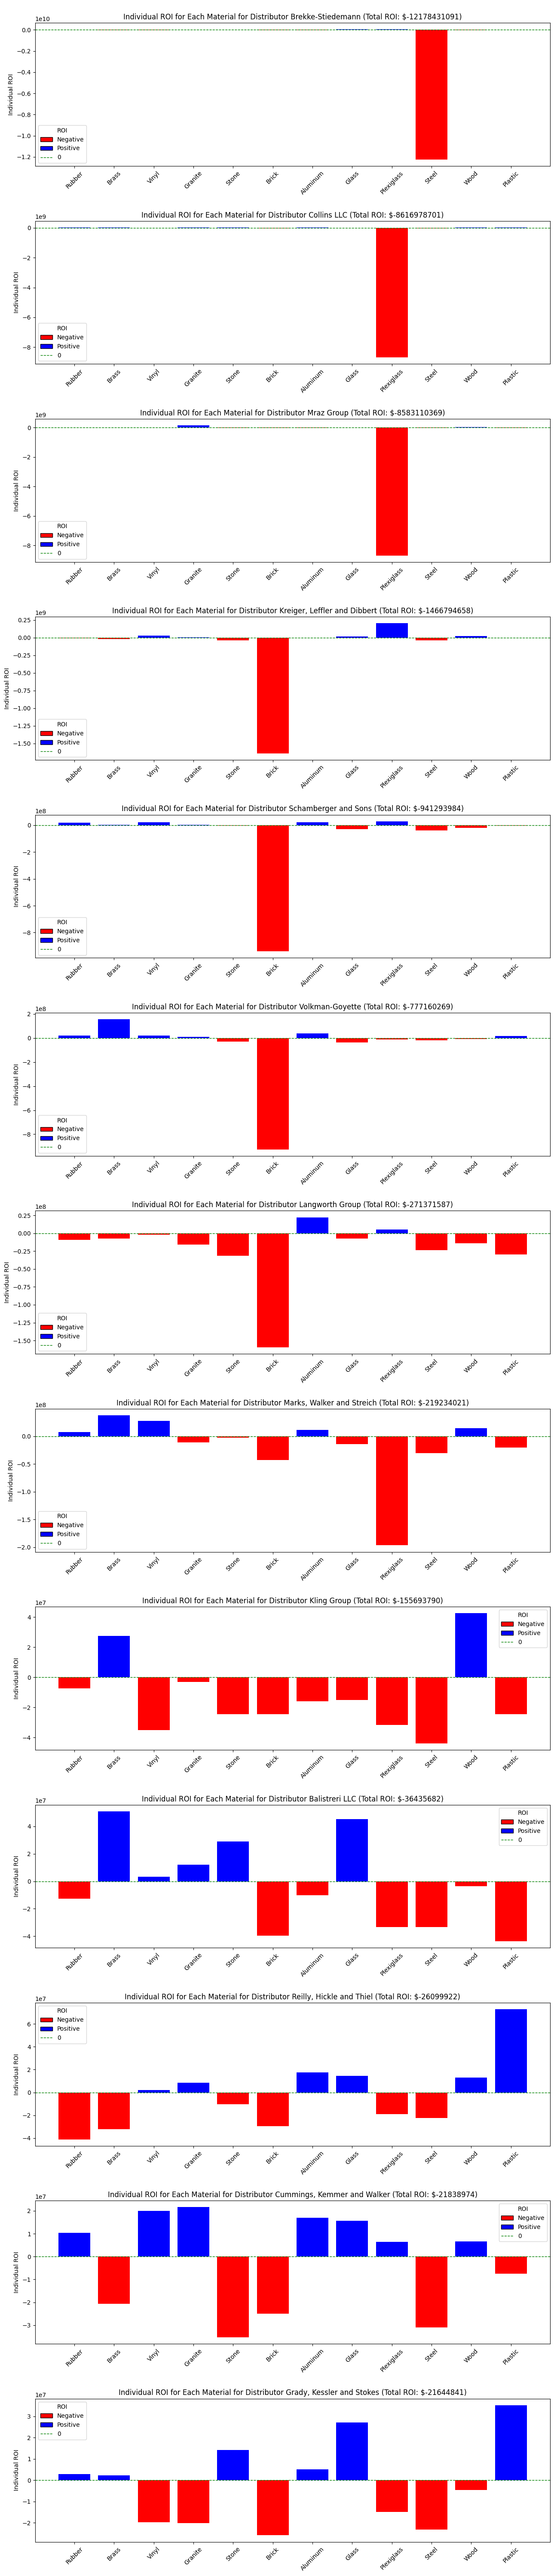

In [47]:
num_graph = 0
positions = distributors_negative_ROI.index.tolist()

fig, axes = plt.subplots(nrows=len(positions), ncols=1, figsize=(13, 60))
axes: list[plt.Axes]

for position in positions:
    columns_to_plot = df_ROI_distributor.columns[4:-1]
    distributor: pd.DataFrame = df_ROI_distributor[columns_to_plot].loc[position]

    colors = ['red' if value < 0 else 'blue' for value in distributor.values]

    axes[num_graph].bar(distributor.index, distributor.values, color=colors)
    axes[num_graph].set_ylabel('Individual ROI')
    axes[num_graph].set_title(f'\nIndividual ROI for Each Material for Distributor {df_ROI_distributor["distributor"].loc[position]} (Total ROI: ${int(df_ROI_distributor["Total"].loc[position])})')
    axes[num_graph].tick_params(axis='x', rotation=45)
    axes[num_graph].axhline(0, color='g', linestyle='--', linewidth=1)

    axes[num_graph].legend(labels=['Negative', 'Positive', '0'], title='ROI',
                           handles=[
                               plt.Rectangle((0, 0), 1, 1, color='red', ec="k"),
                               plt.Rectangle((0, 0), 1, 1, color='blue', ec="k"),
                               plt.Line2D([0], [0], color='g', linestyle='--', linewidth=1)
                           ])
    num_graph += 1

plt.tight_layout()
plt.show()

We create a more detailed chart for distributors with negative ROI, showing their materials with negative ROI to visualize the difference between sales and exports.

#### Detailed Chart of Sales vs. Exports for Distributors with Negative ROI

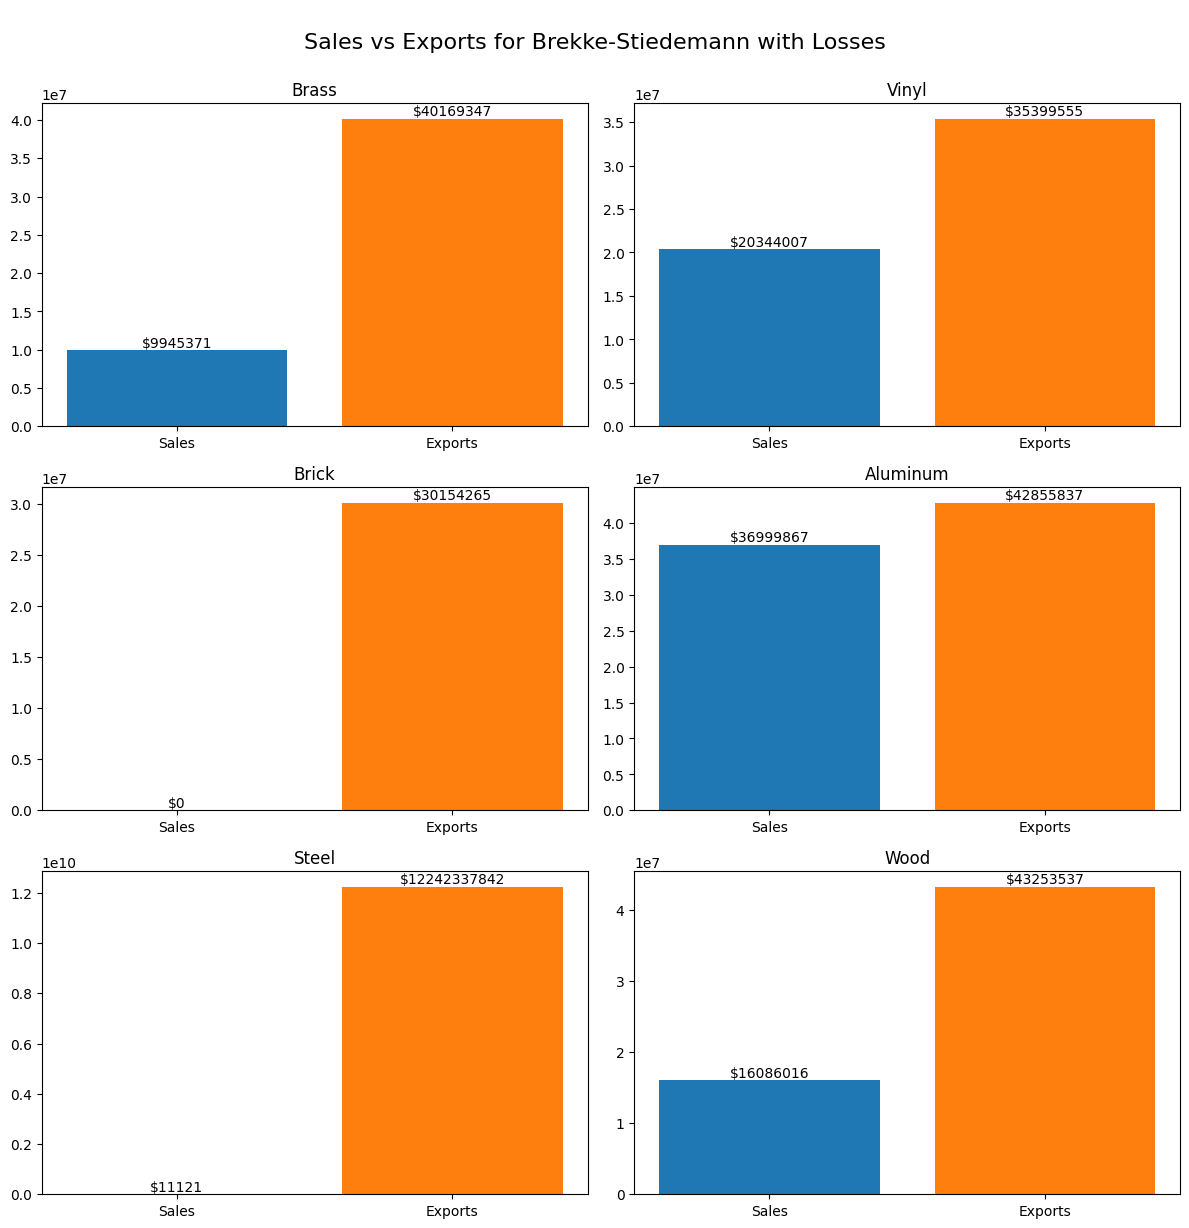

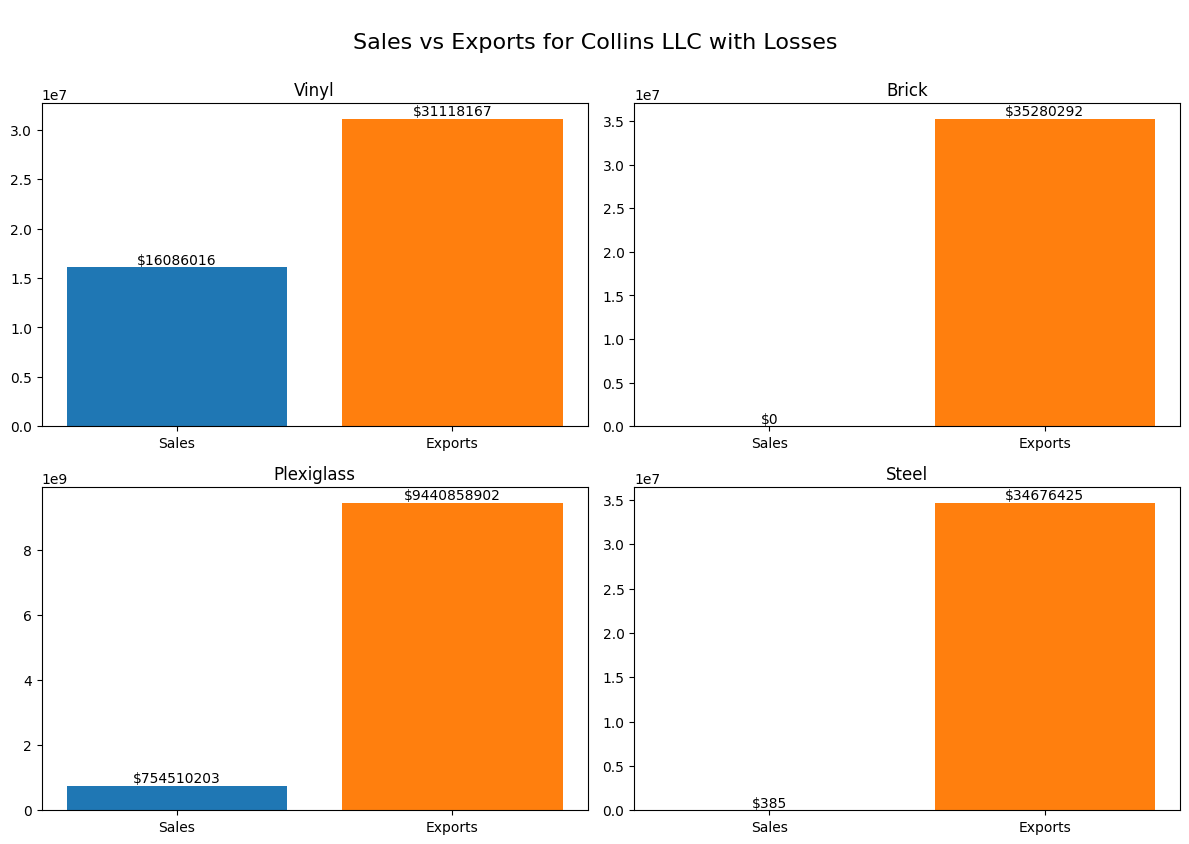

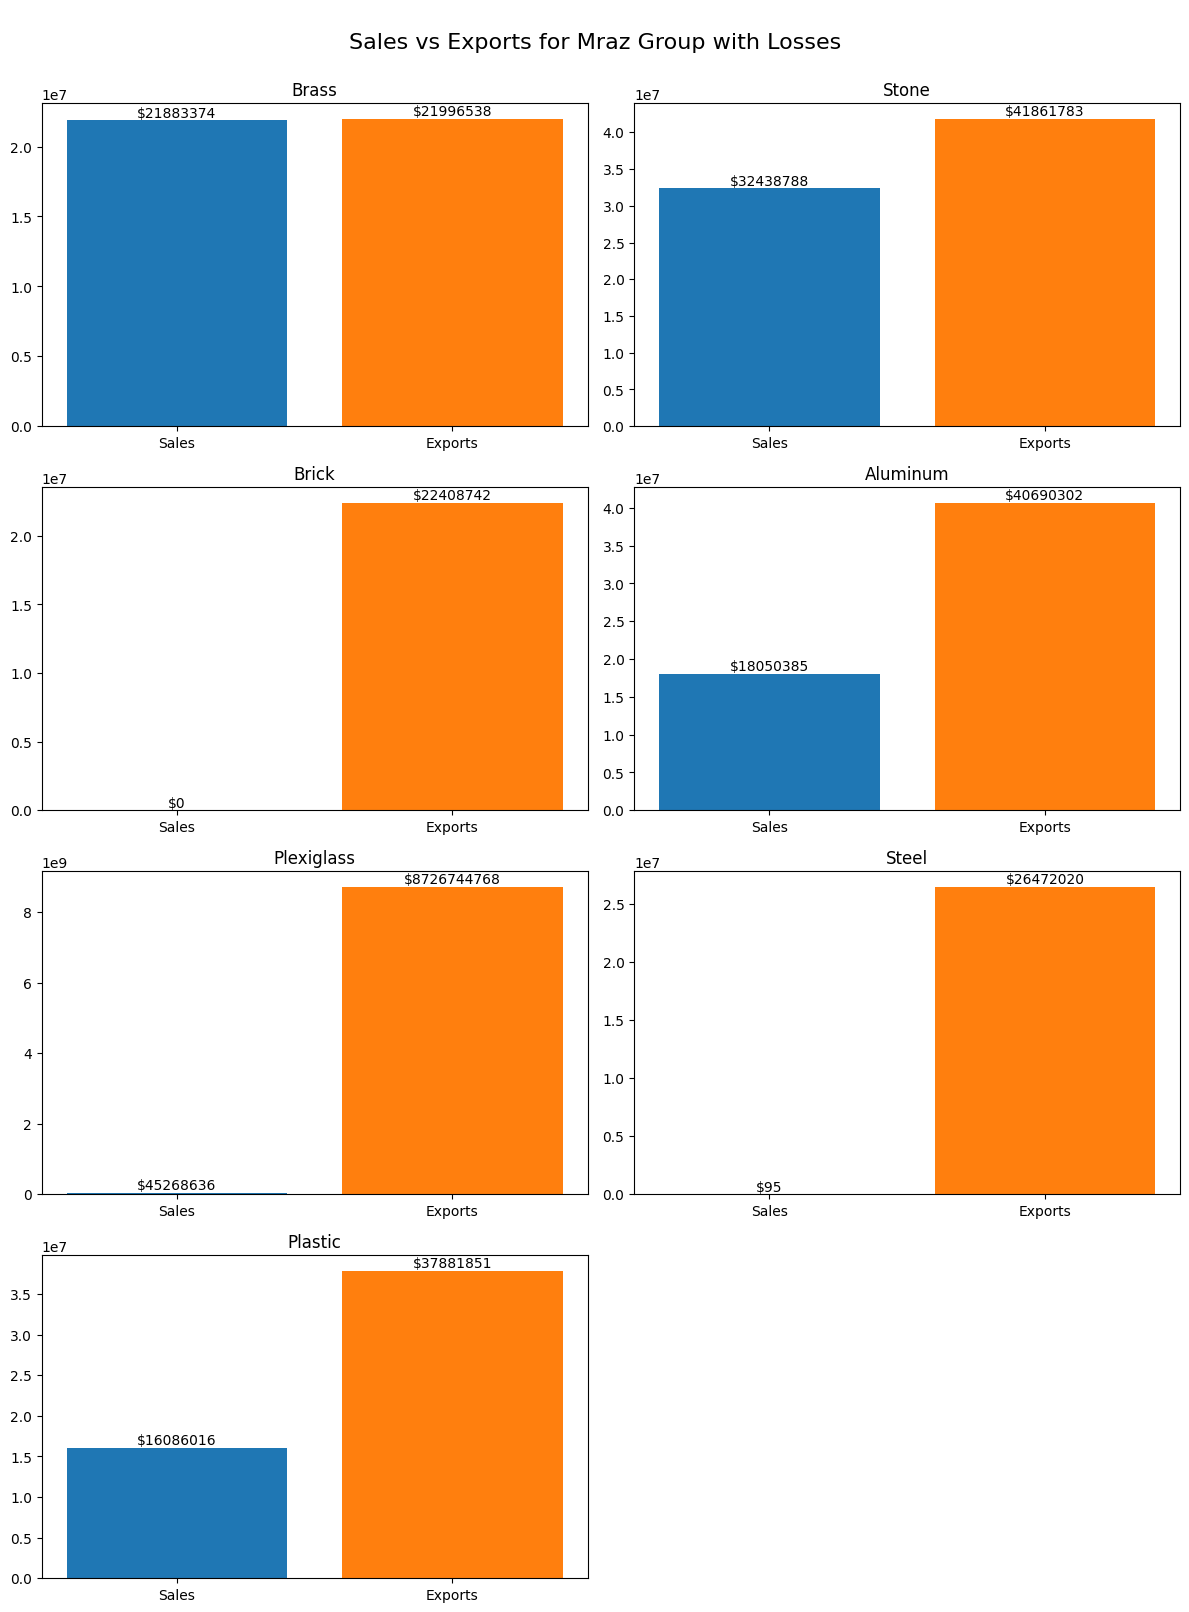

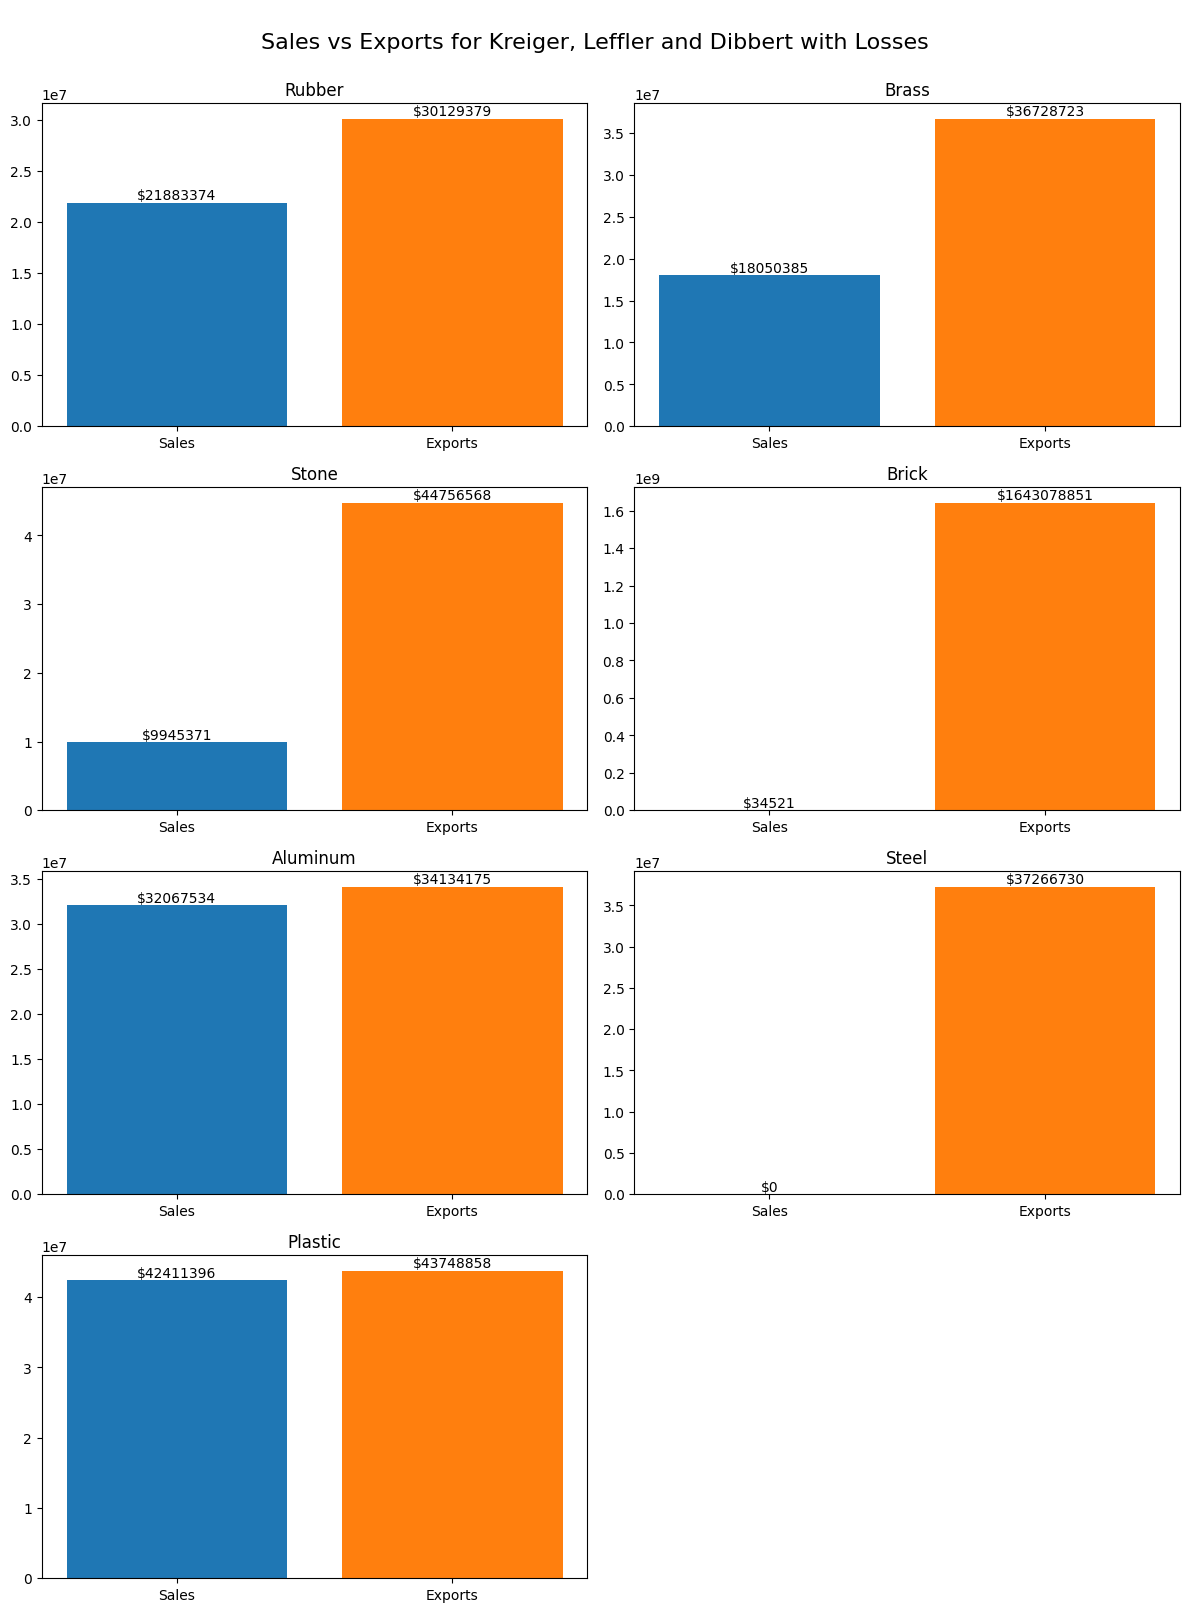

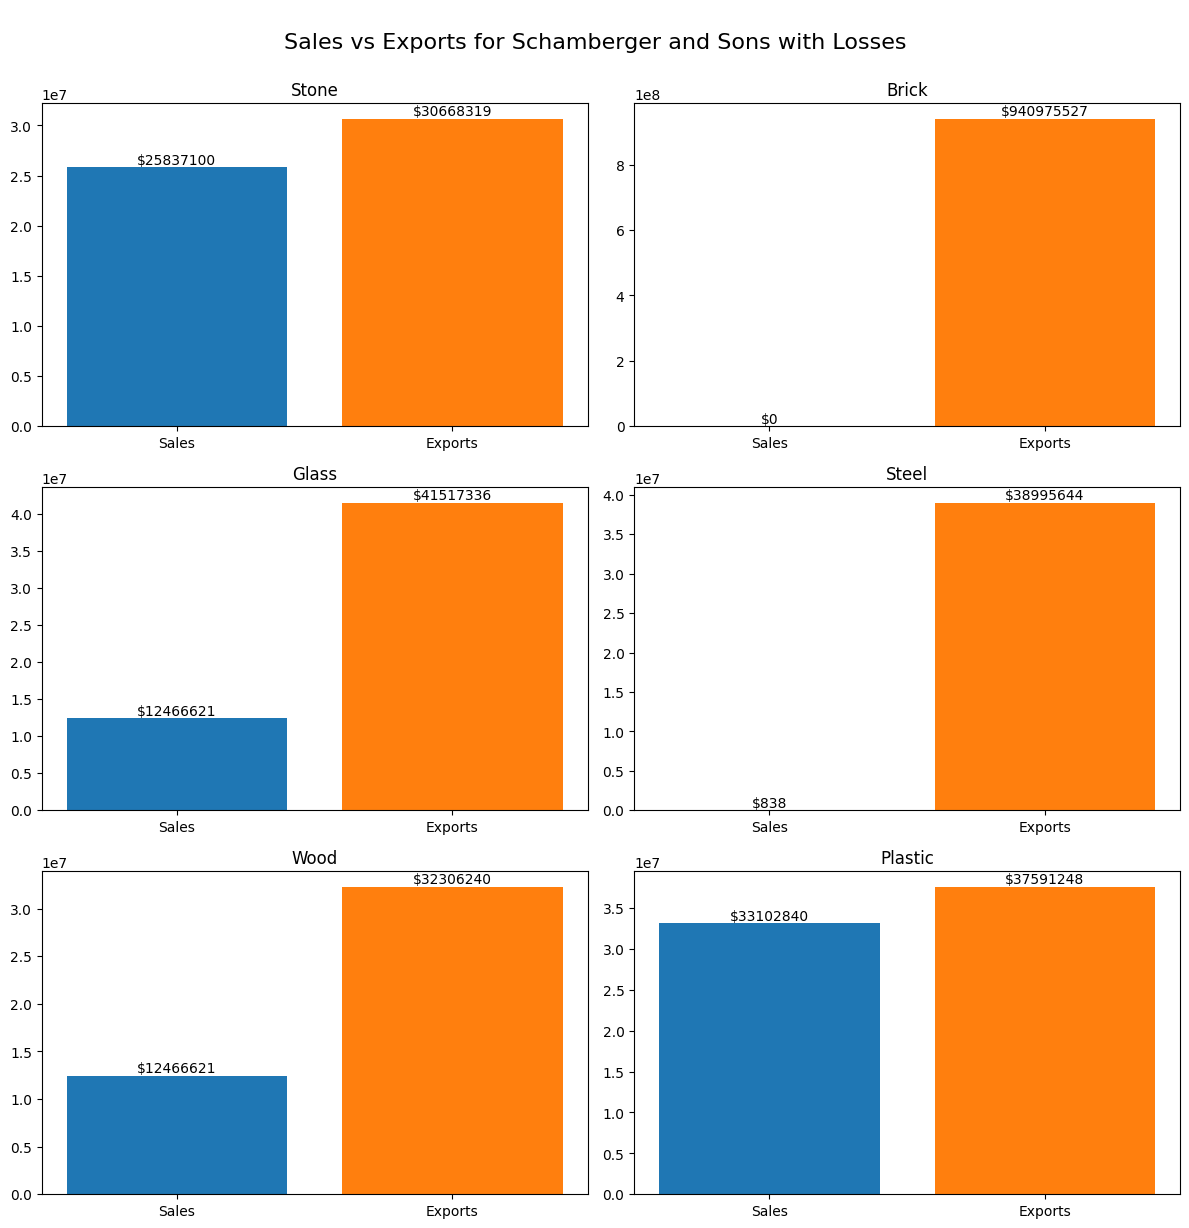

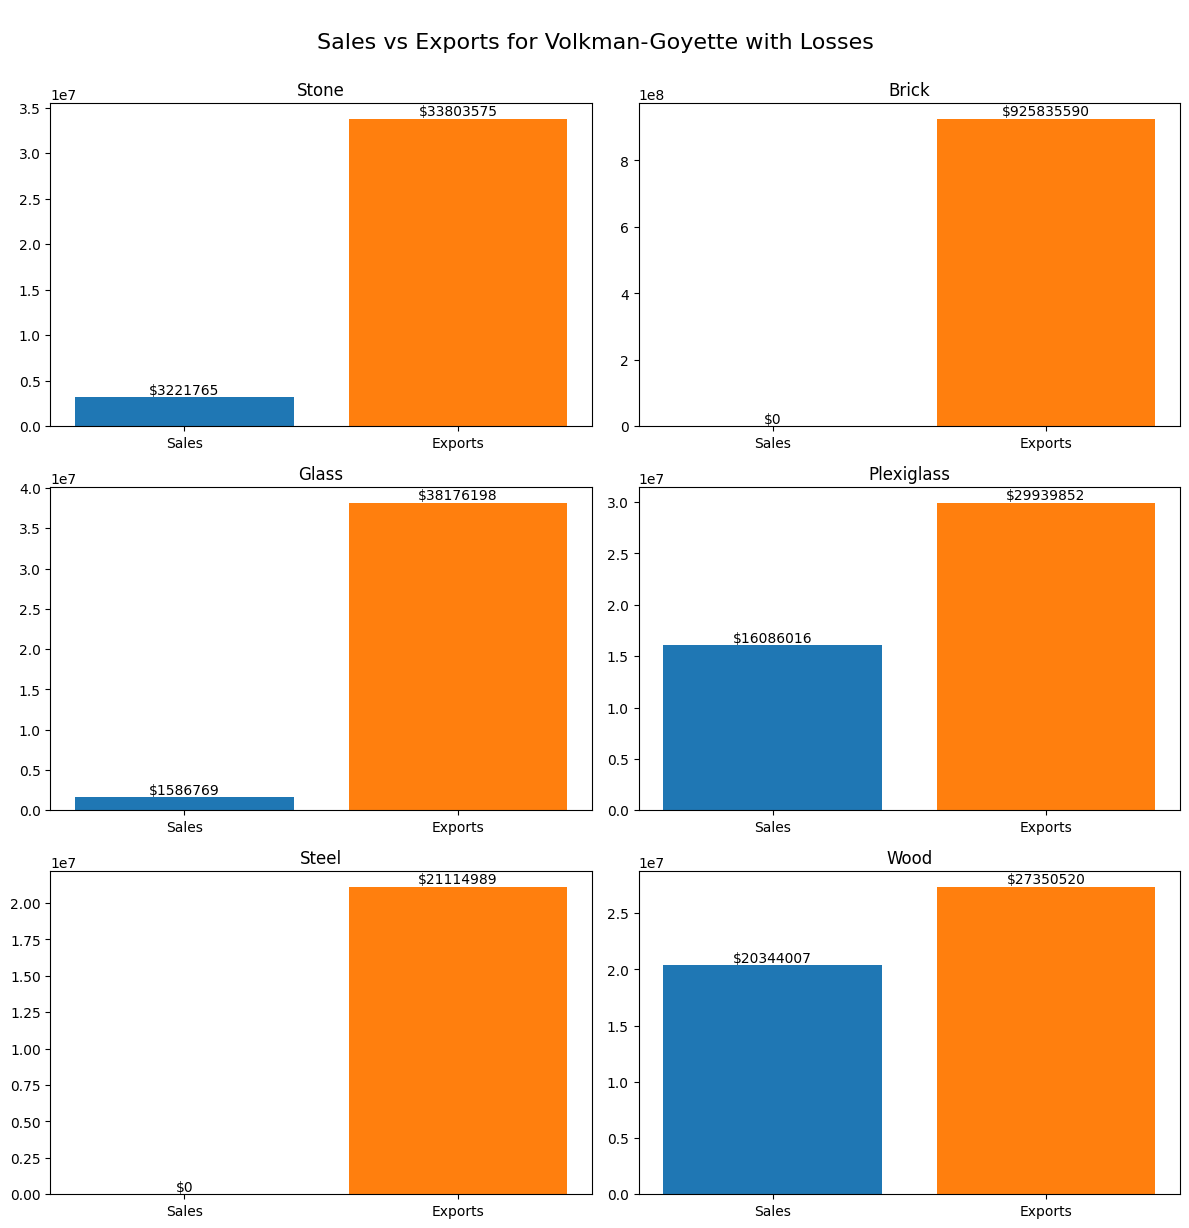

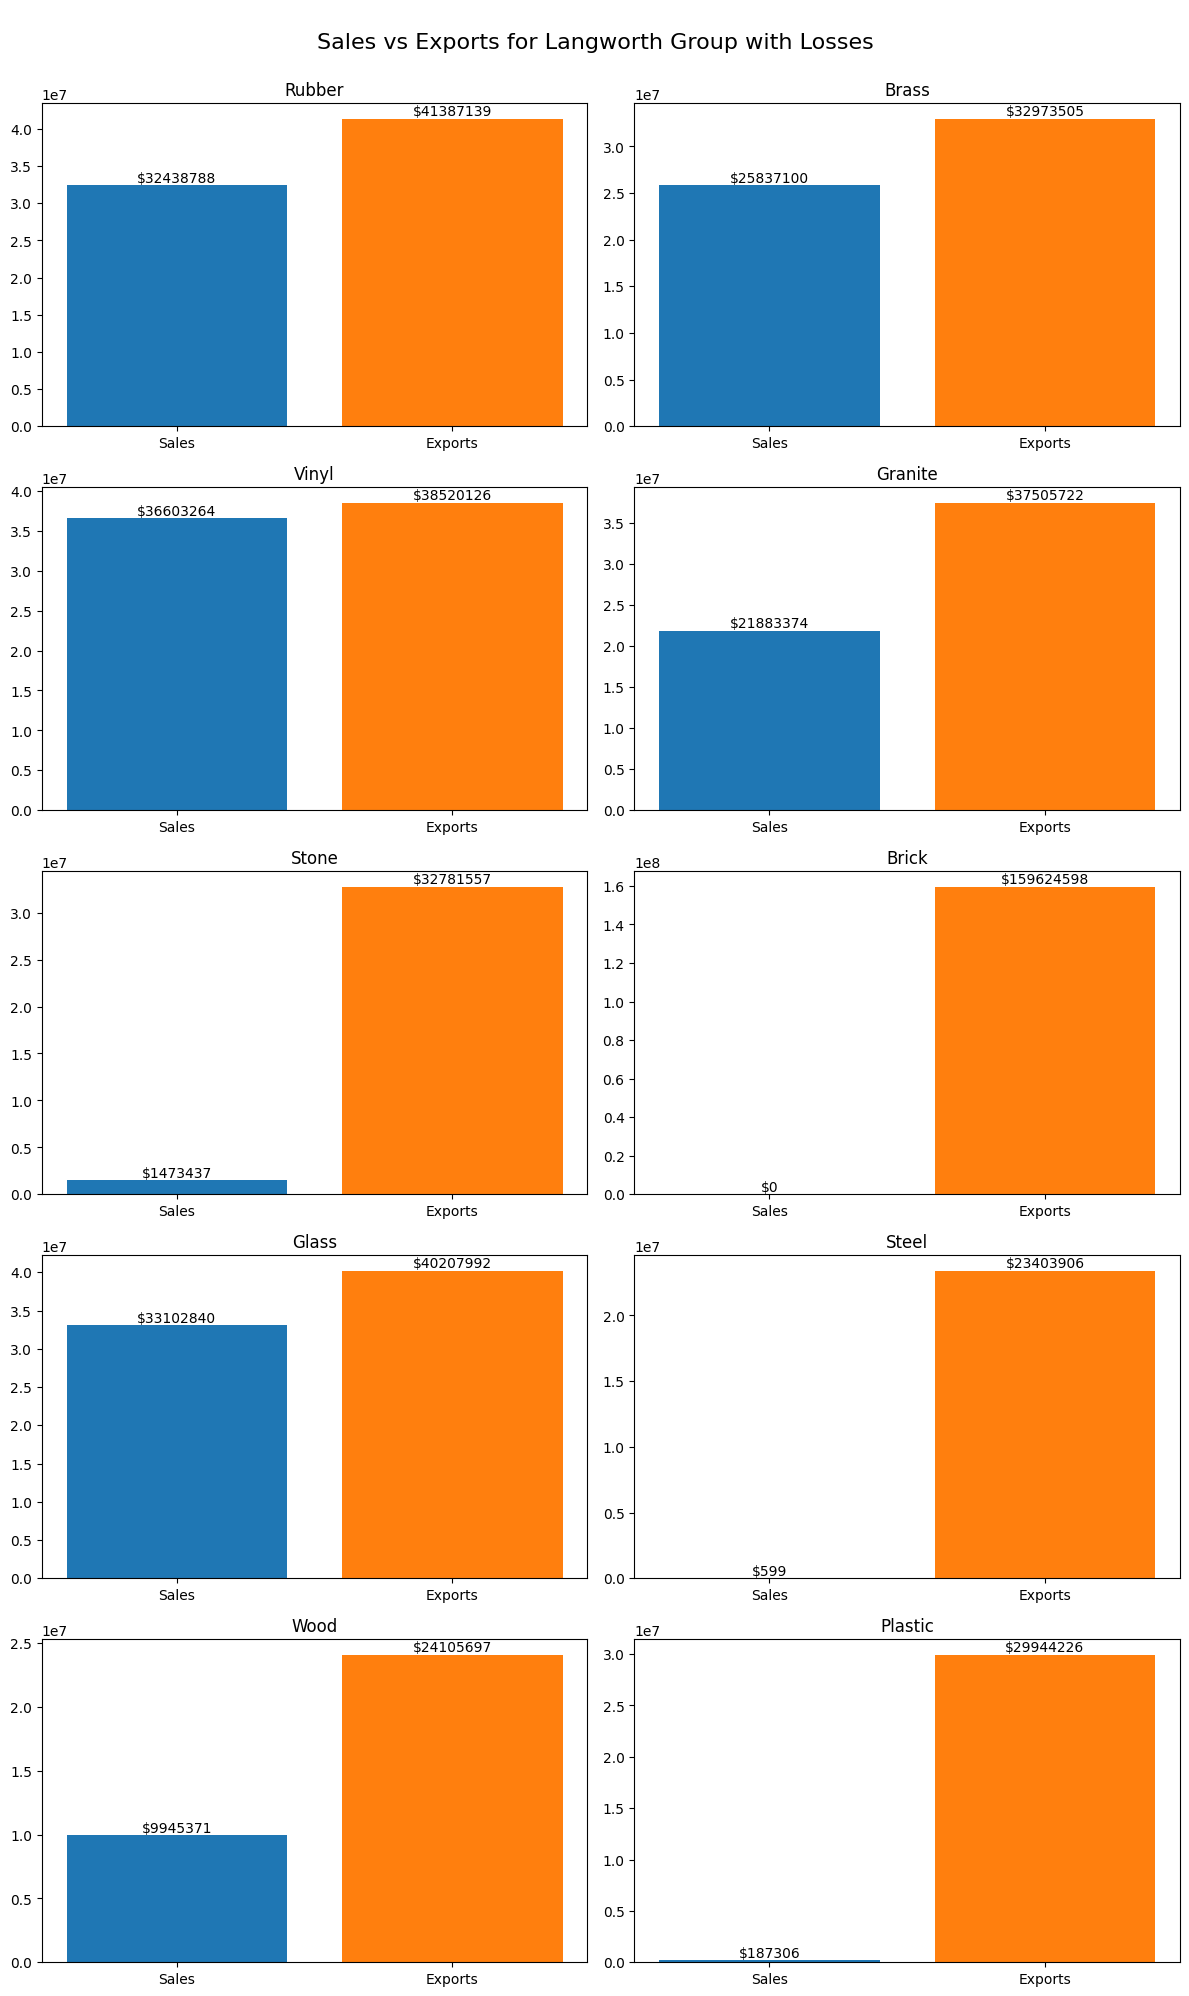

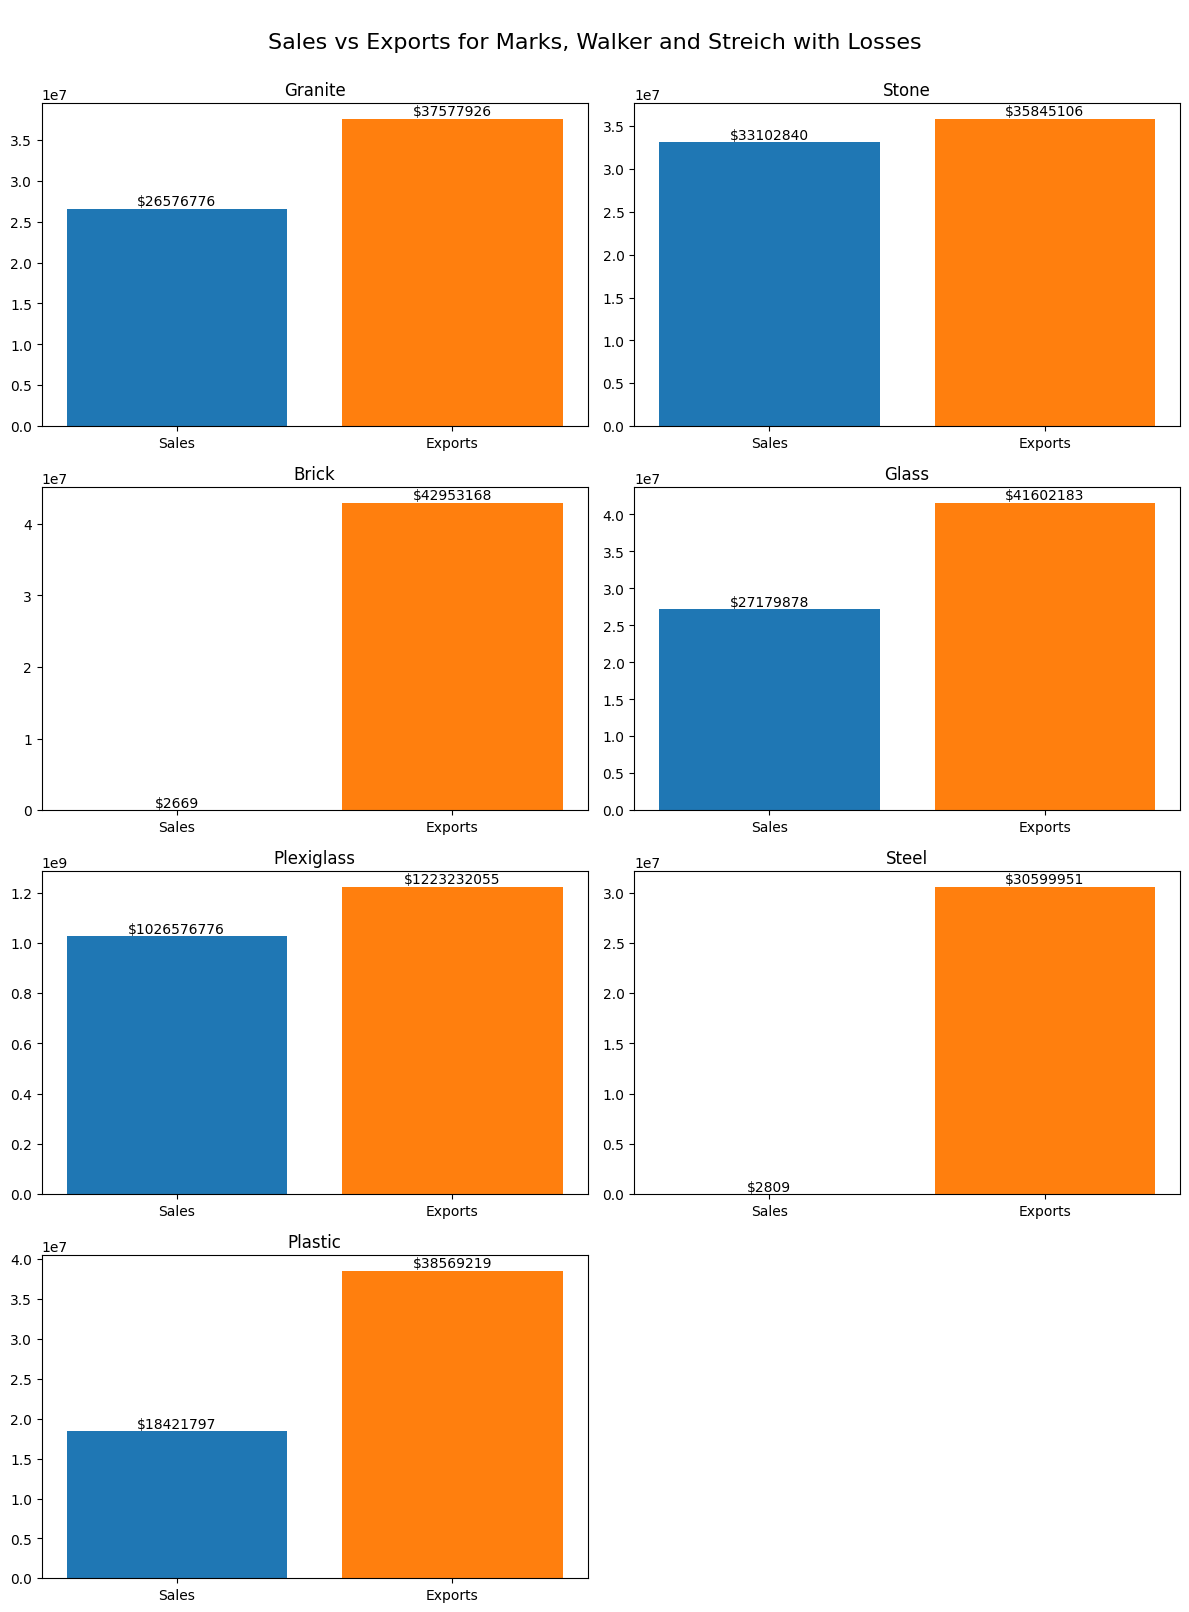

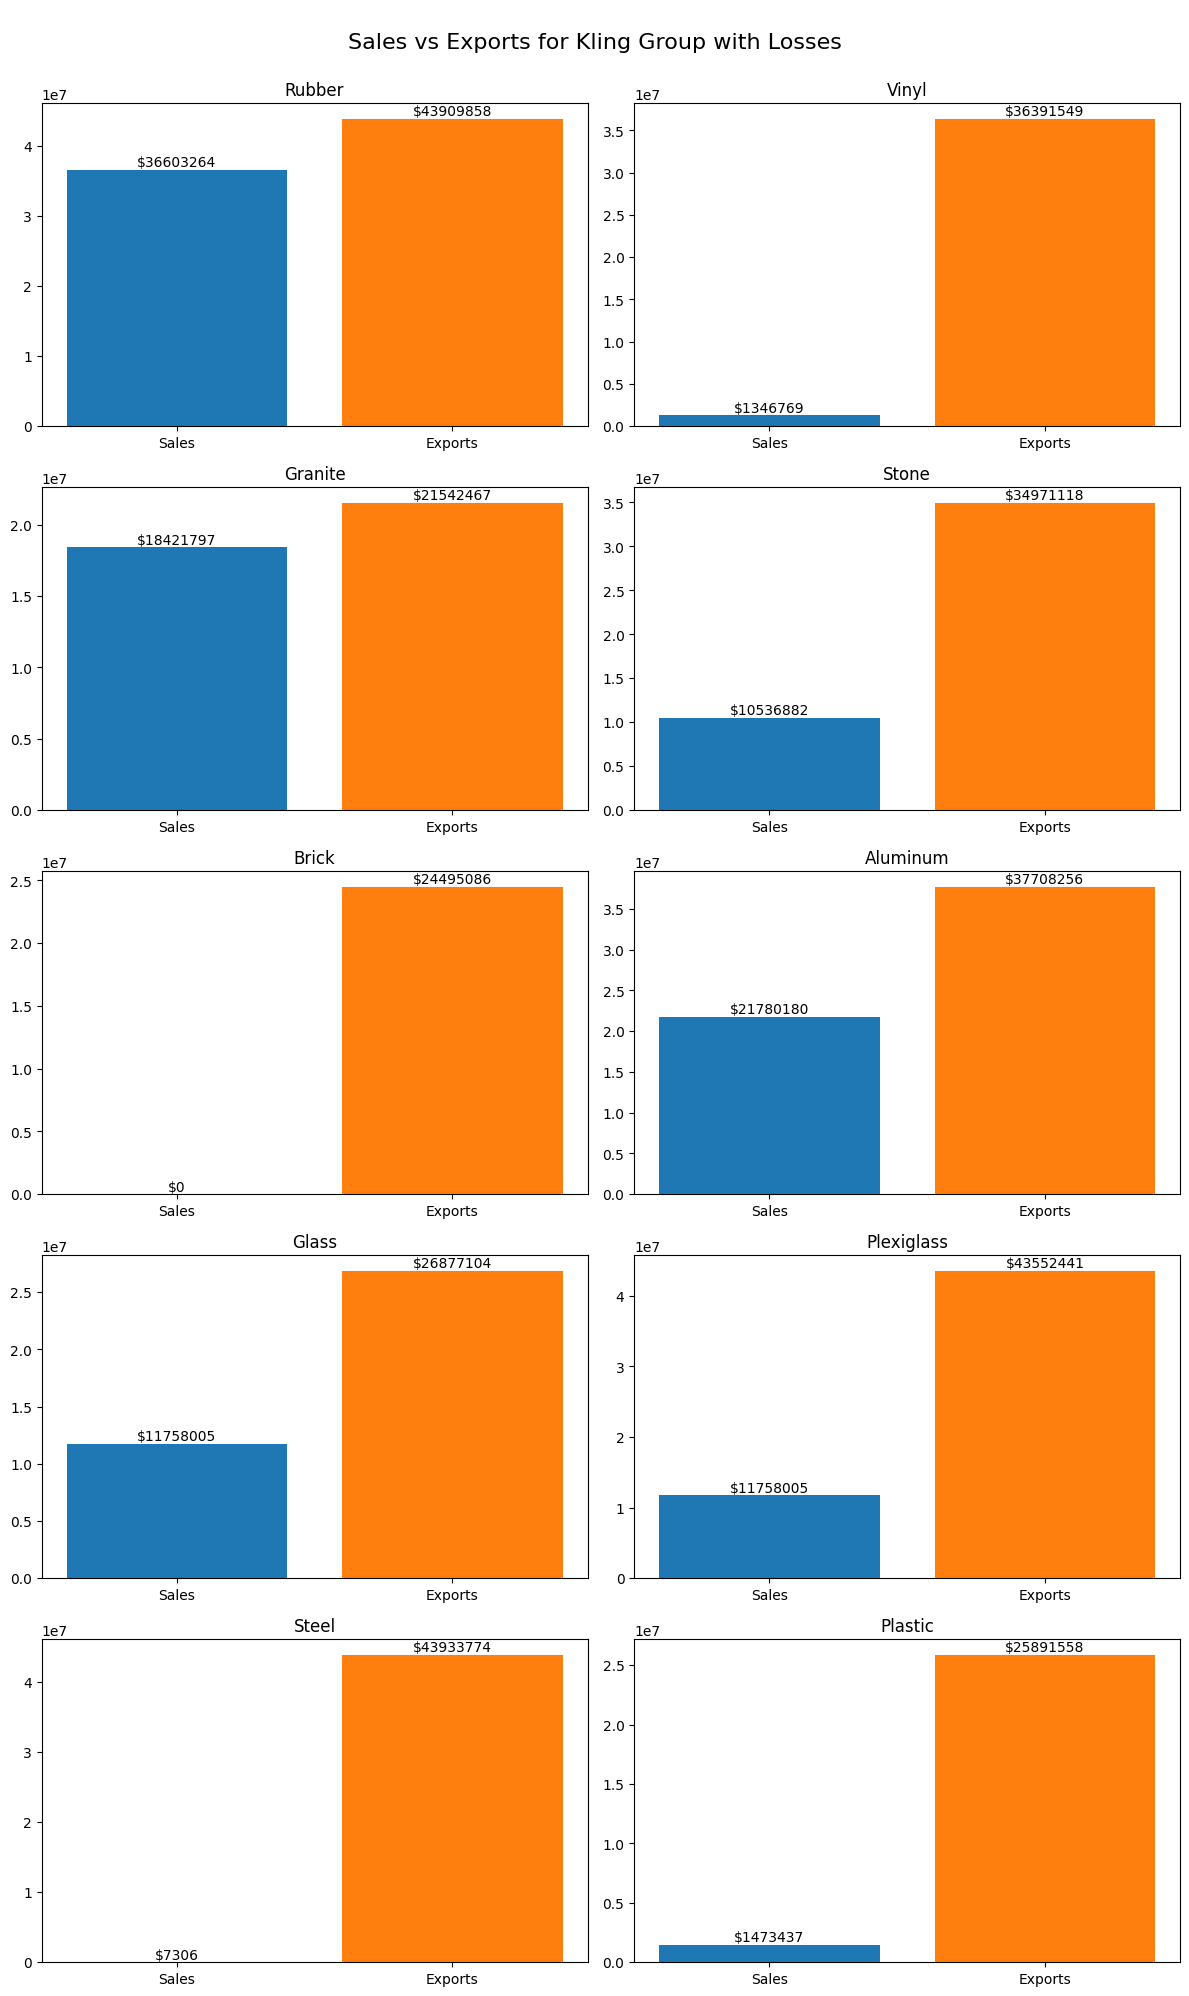

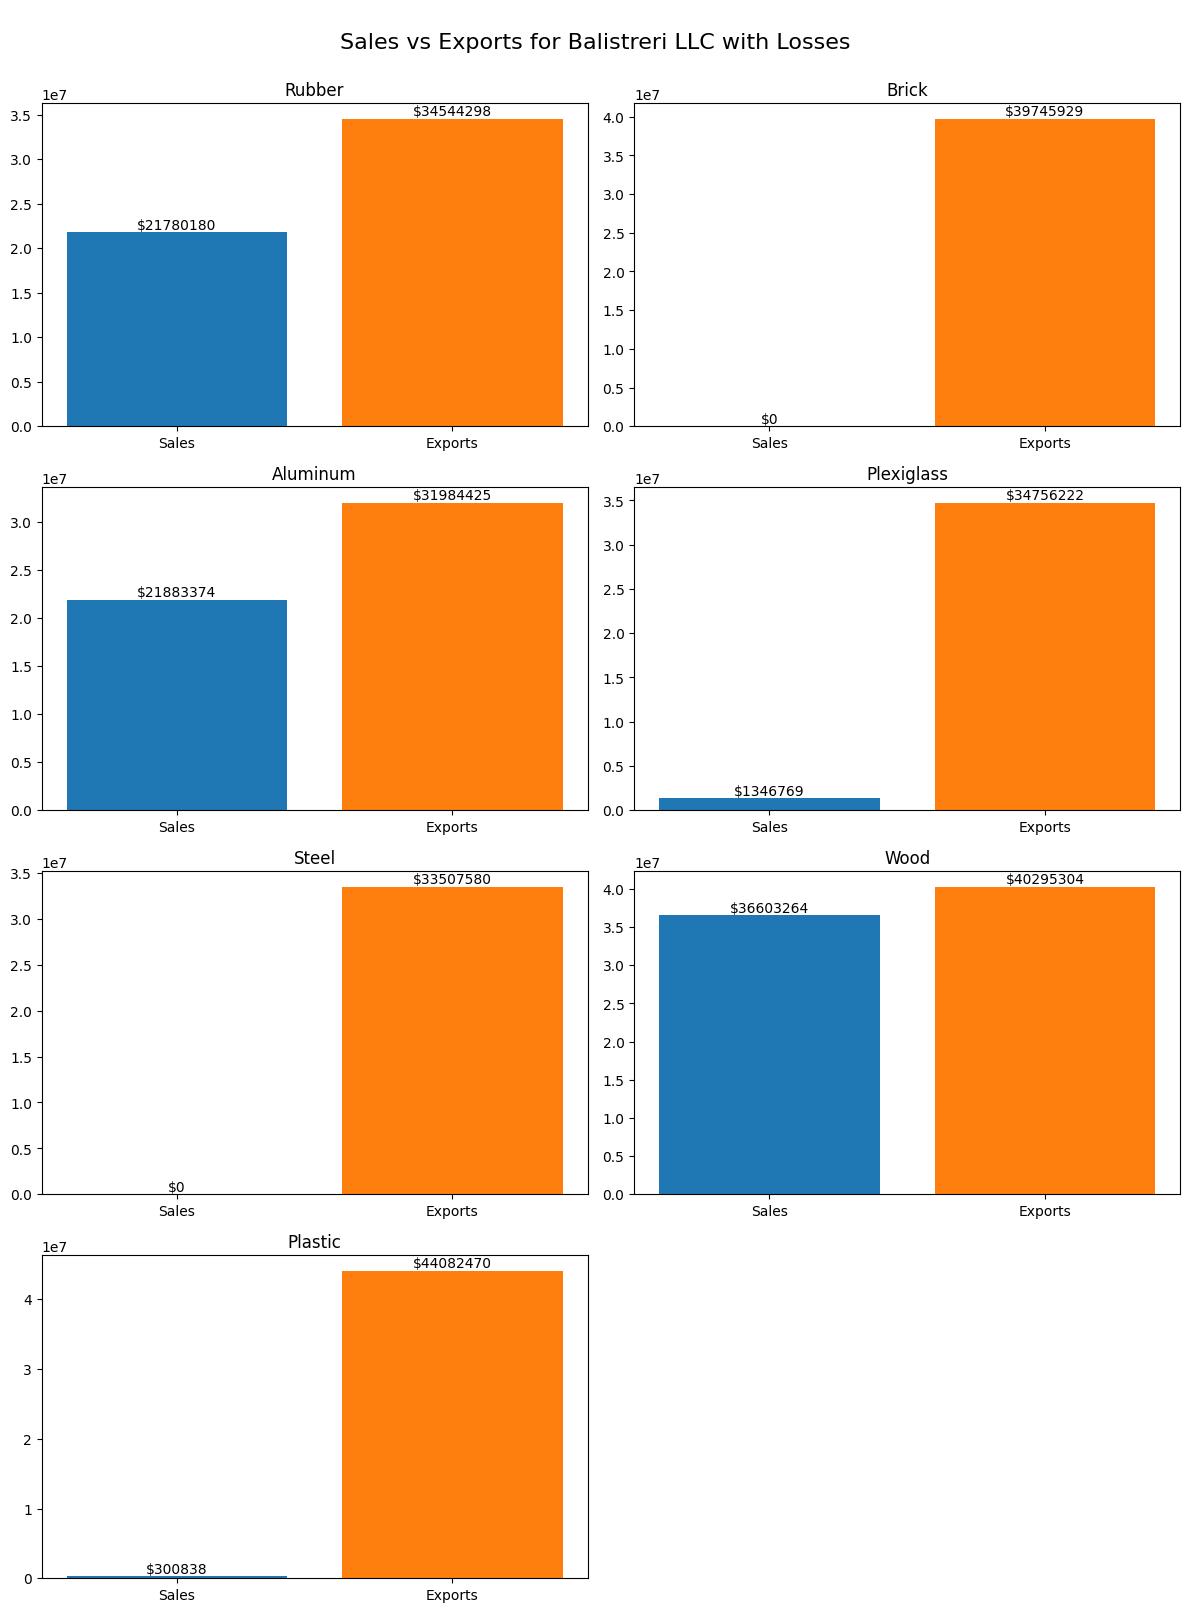

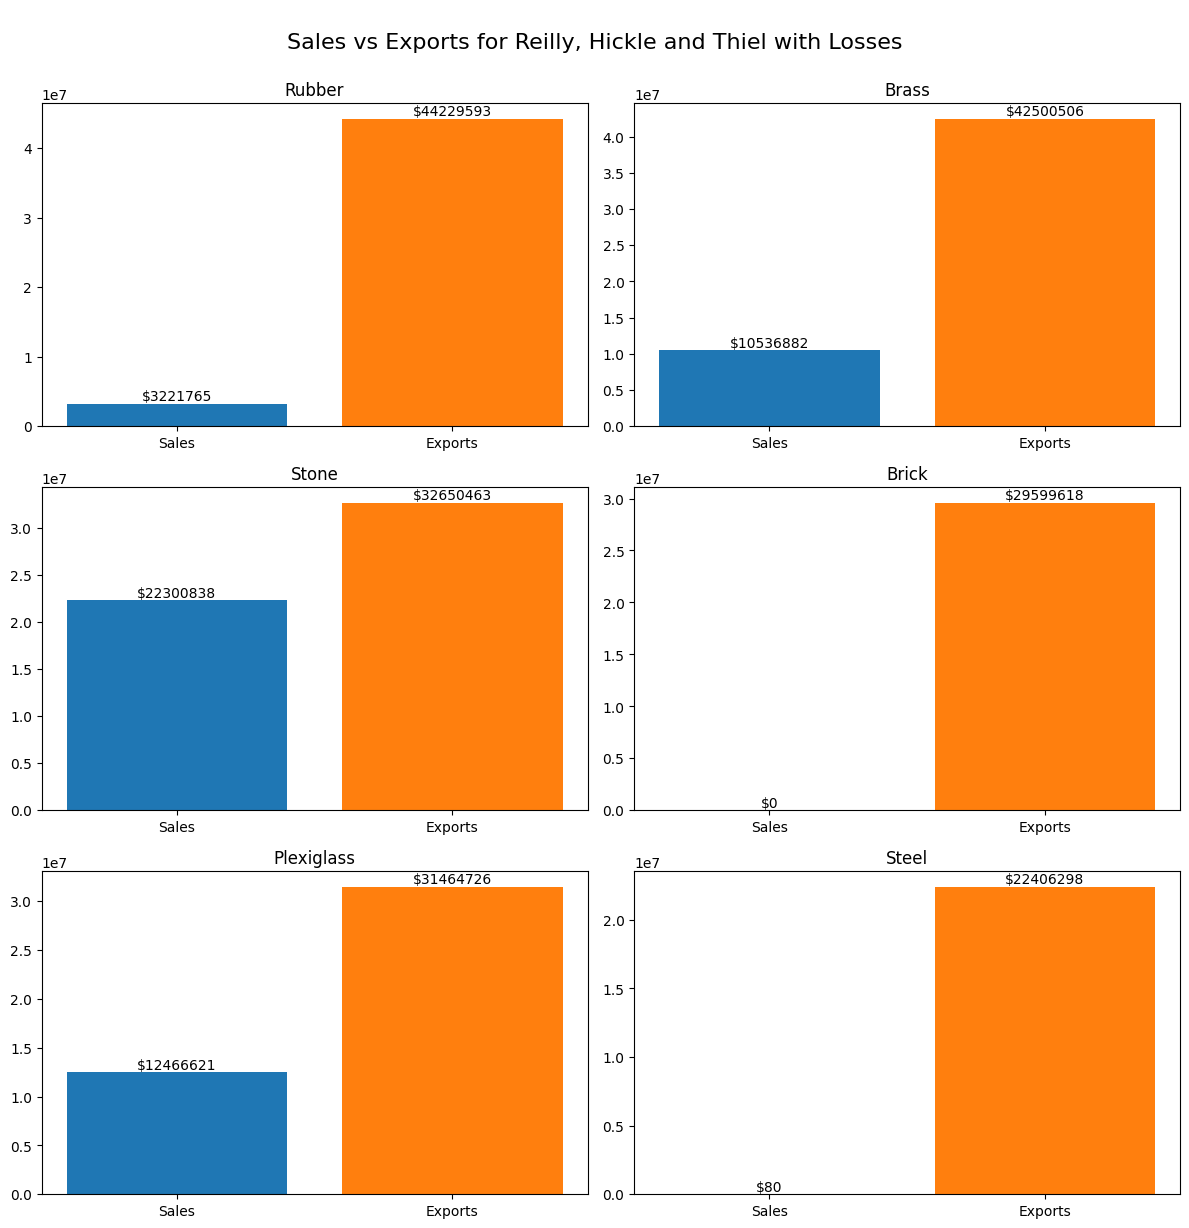

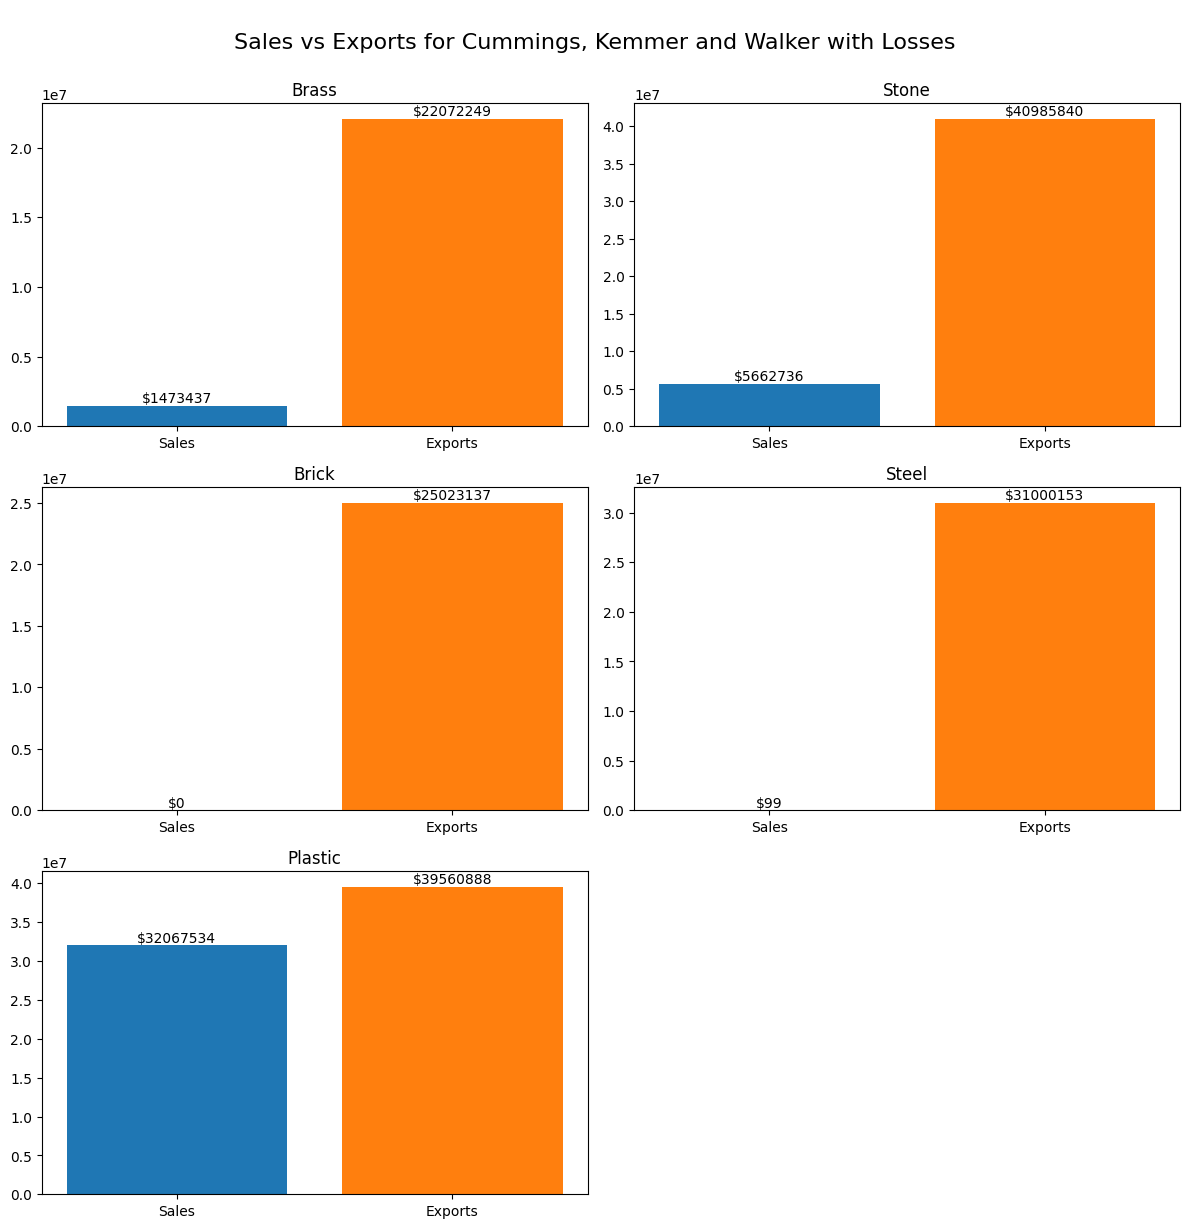

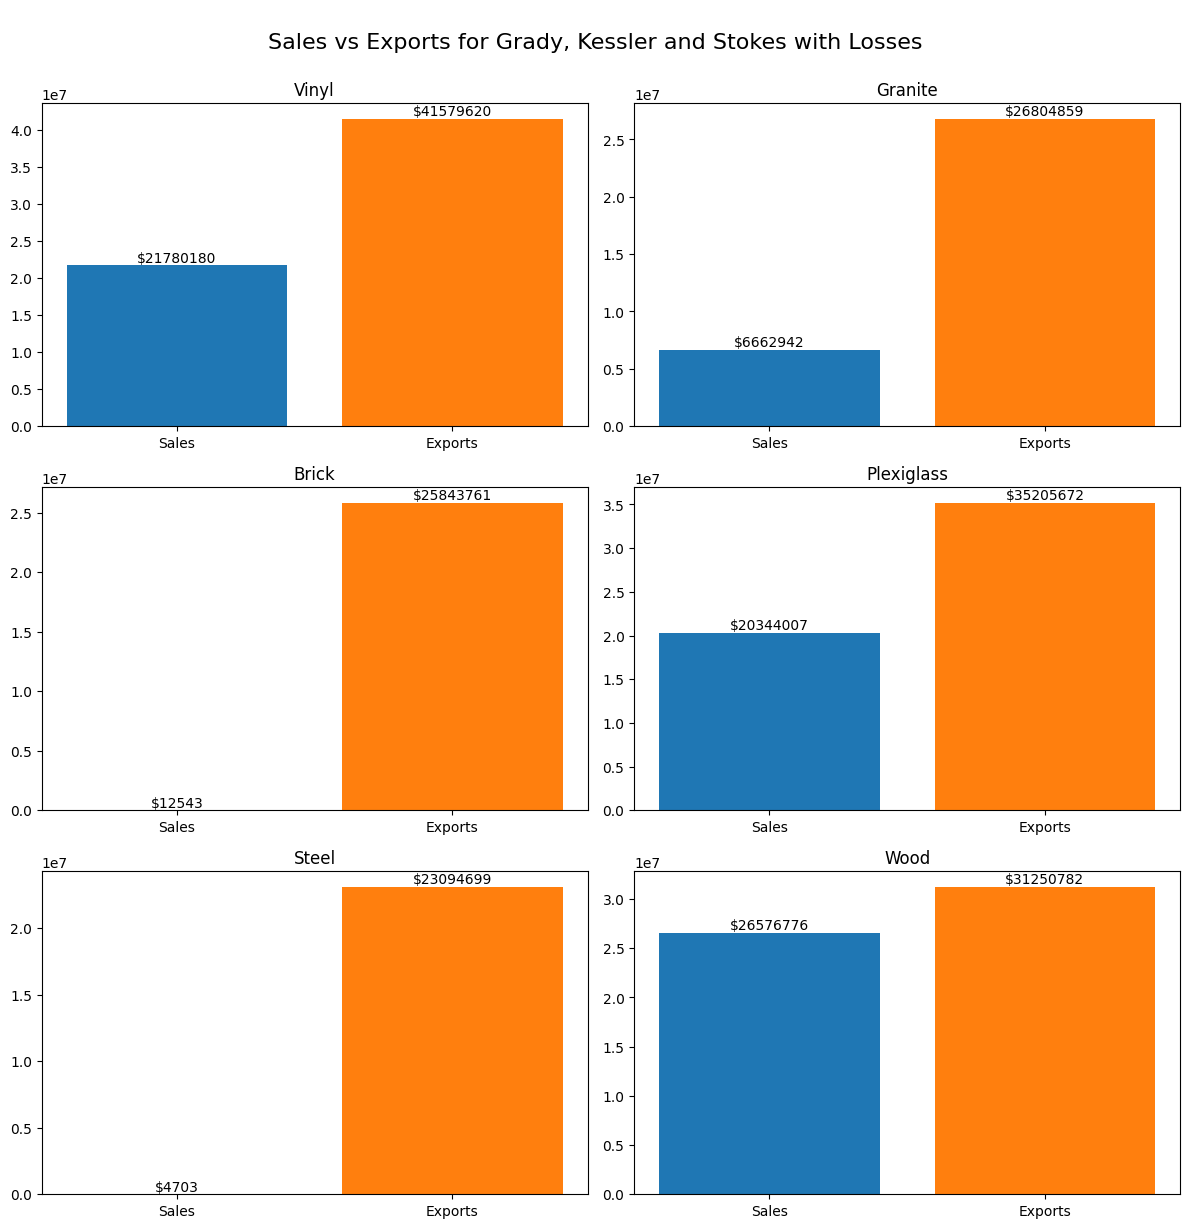

In [48]:
materials = distributors_negative_ROI.columns[4:-1]
distributors_id = distributors_negative_ROI['distributor_id']
distributors = distributors_negative_ROI['distributor']

for distributor_id, distributor in zip(distributors_id, distributors):
    fig, axes = plt.subplots(6, 2, figsize=(12, 24))
    axes = axes.flatten()
    fig.suptitle(f'\nSales vs Exports for {distributor} with Losses\n\n', fontsize=16)

    pos = 0  # Counter for valid subplots
    for material in materials:
        roi_value = distributors_negative_ROI.loc[distributors_negative_ROI['distributor_id'] == distributor_id, material].values

        if roi_value.size > 0 and roi_value[0] < 0:
            sales_val = df_sales.loc[df_sales['distributor_id'] == distributor_id, material].values
            exports_val = df_exports.loc[df_exports['distributor_id'] == distributor_id, material].values

            if sales_val.size > 0 and exports_val.size > 0:
                sales_val = sales_val[0]
                exports_val = exports_val[0]

                sales_bar = axes[pos].bar('Sales', sales_val)
                exports_bar = axes[pos].bar('Exports', exports_val)

                axes[pos].bar_label(sales_bar, labels=[f'${int(sales_val)}'])
                axes[pos].bar_label(exports_bar, labels=[f'${int(exports_val)}'])

                axes[pos].set_title(material)
                pos += 1

    # Remove empty subplots
    for j in range(pos, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

## CONCLUSION


>### **CONCLUSION**
>
>**The Problem:** We observed that the main factor behind the low ROI is the loss or negative ROI caused by certain materials. This disparity between exports and sales indicates that materials exported but not sold result in losses or negative ROIs.
>
>**The Reason:** We have identified materials that cause significant losses for both distributors with positive and negative total ROIs. Therefore, it is crucial to analyze which specific materials are causing these substantial losses or negative ROIs for each distributor. It is recommended to consider ceasing the export of these materials to distributors where they generate negative ROIs, as they appear to have no demand in the market or city where they operate.




